In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 선형회귀분석 모델
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가 함수
from sklearn.metrics import r2_score
# 선형 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# 한글 폰트 설정 (mac용)
matplotlib.rc("axes", unicode_minus=False)
matplotlib.rcParams["font.family"] = 'AppleGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')



In [2]:
# 기본 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 깨짐 방지 (Mac용)
import matplotlib
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
df = pd.read_csv('./data/df_clean.csv', parse_dates=['OrderDT', 'DeliveryDT'])

# 확인
print("데이터 shape:", df.shape)
print("컬럼 목록:\n", df.columns)
df.head()


데이터 shape: (856727, 32)
컬럼 목록:
 Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')


,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,DeliveryDT,Deli_Year,Deli_Month,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Duration,Deli_Hours,IsMorningDelivery
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,1,13,...,2022-01-14 06:28:00,2022,1,14,6,28,0,0 days 13:38:00,13.633333,1


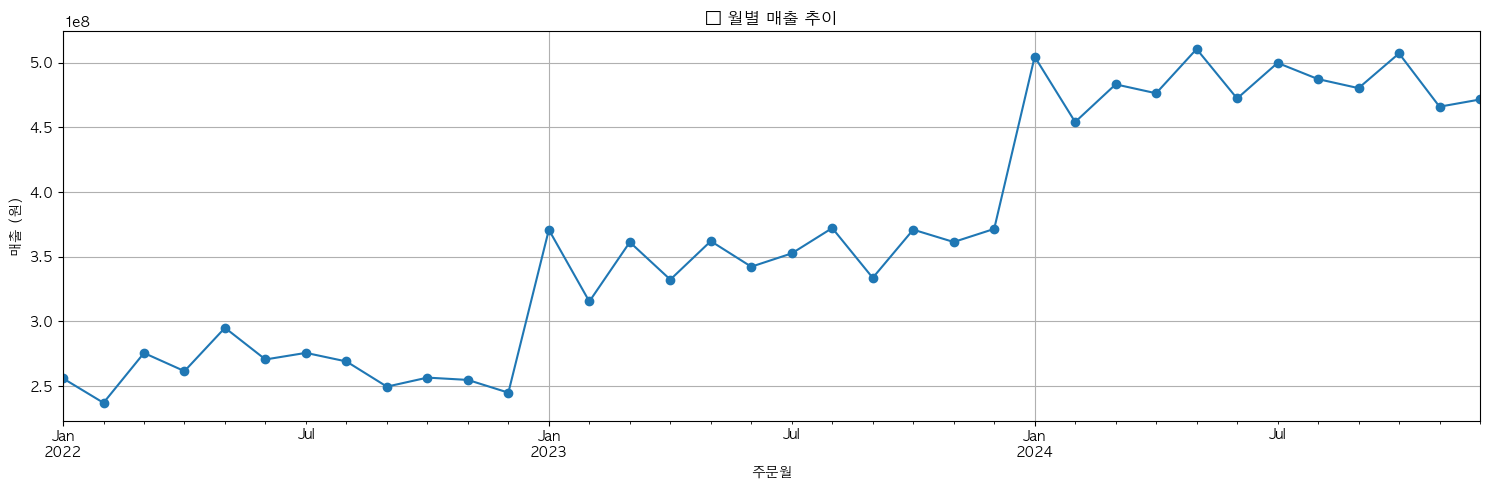

In [ ]:
# 월 단위 추출
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # Period 타입

# 월별 매출 합계
monthly_sales = df.groupby('OrderMonth')['Price'].sum()

# 시각화
plt.figure(figsize=(15, 5))
monthly_sales.plot(marker='o')
plt.title('월별 매출 추이')
plt.xlabel('주문월')
plt.ylabel('매출 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()


## 시간대별 매출패턴

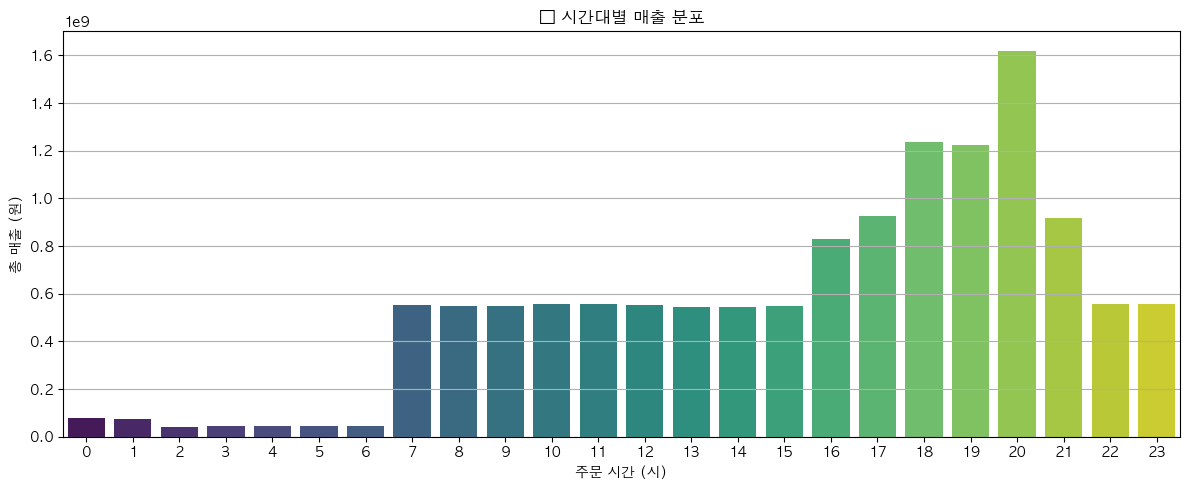

In [ ]:
# 시간대별 매출 합계
hourly_sales = df.groupby('OrderHour')['Price'].sum()

# 시각화
plt.figure(figsize=(12,5))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='viridis')
plt.title("시간대별 매출 분포")
plt.xlabel("주문 시간 (시)")
plt.ylabel("총 매출 (원)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


###  [시간대별 매출 분포] 해석
관찰 포인트:
20시(저녁 8시) 매출이 가장 많고, 18~21시 사이에 매출이 집중되어 있음.

새벽 시간대 (0~6시) 매출은 거의 없음. → 고객이 주로 "낮에 주문하고 새벽에 받는" 패턴.

**오전(7~11시)**에도 일정한 매출량 유지 → 일부 오전 구매 고객 존재.

 인사이트:
프라임 타임: 18~21시

이 시간대에 마케팅/푸시 알림/할인 쿠폰을 집중하면 매출 극대화 가능

새벽 시간에 주문 유입이 거의 없으므로, 야간 고객 유입 확대를 위한 타겟 마케팅도 고려해볼 수 있음 (예: 2030 싱글가구 대상 심야 혜택)

시간대별 인기 상품군도 추후 분석하면 좋을 듯

## 요일별 매출 패턴

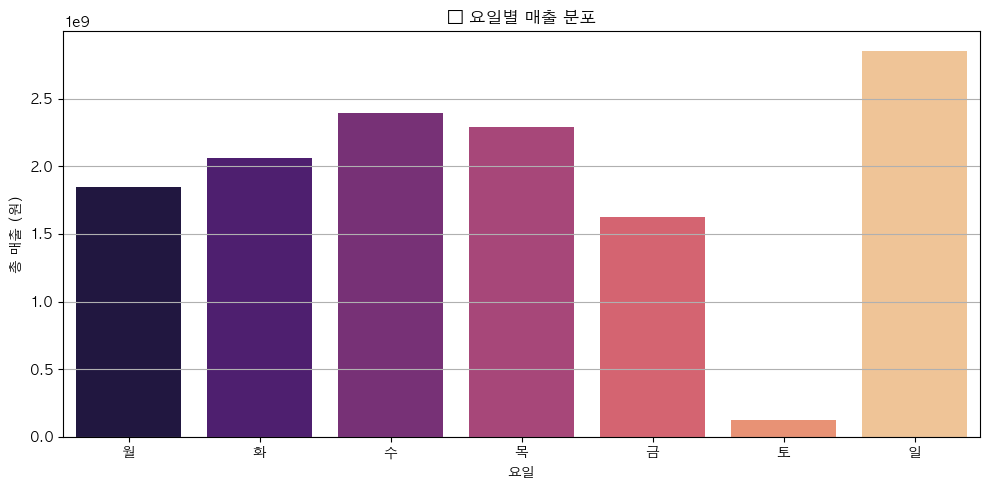

In [ ]:
# 요일 컬럼 생성 (0=월, 6=일)
df['OrderWeekday'] = df['OrderDT'].dt.weekday

# 한글 요일명 매핑
weekday_map = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
df['OrderWeekdayName'] = df['OrderWeekday'].map(weekday_map)

# 요일별 매출 집계
weekday_sales = df.groupby('OrderWeekdayName')['Price'].sum().reindex(['월', '화', '수', '목', '금', '토', '일'])

# 시각화
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='magma')
plt.title("요일별 매출 분포")
plt.xlabel("요일")
plt.ylabel("총 매출 (원)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## 고객군(2030 vs 4060) 별 시간대·요일별 매출 패턴 비교

In [54]:
# 연령대 컬럼 ('AgeGroup') 기준으로 필터링
df_2030 = df[df['AgeGroup'].isin(['20대', '30대'])].copy()
df_4060 = df[df['AgeGroup'].isin(['40대', '50대', '60대'])].copy()


### 시간대별 매출 비교 (2030 vs 4060)

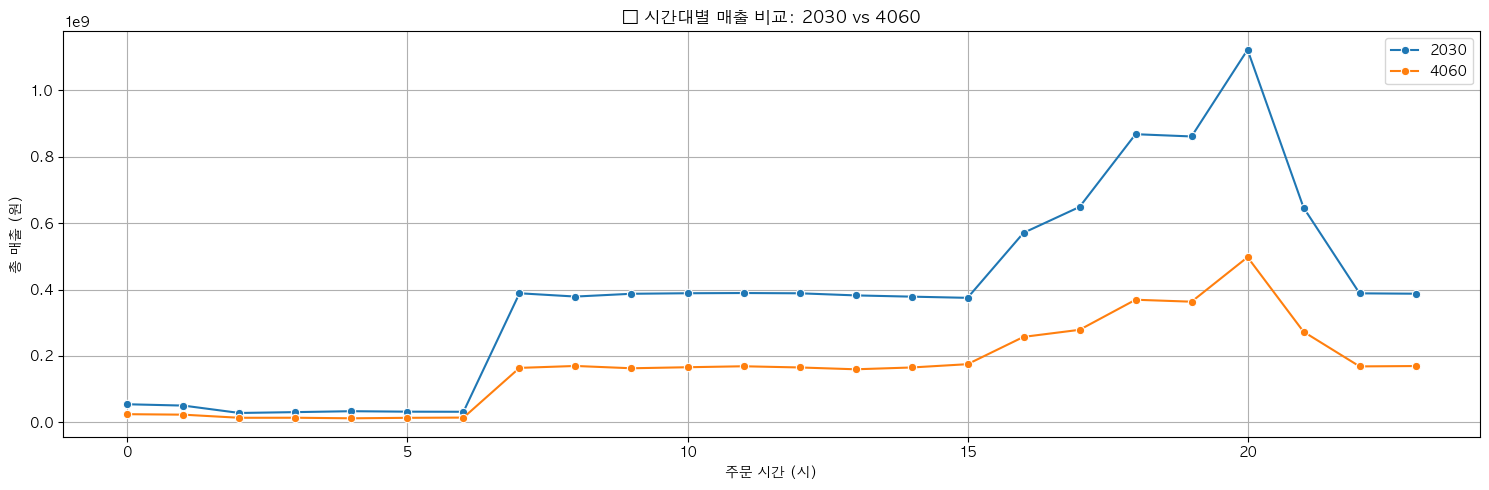

In [ ]:
# 그룹별 시간대 매출 집계
hourly_2030 = df_2030.groupby('OrderHour')['Price'].sum()
hourly_4060 = df_4060.groupby('OrderHour')['Price'].sum()

# 시각화
plt.figure(figsize=(15,5))
sns.lineplot(x=hourly_2030.index, y=hourly_2030.values, label='2030', marker='o')
sns.lineplot(x=hourly_4060.index, y=hourly_4060.values, label='4060', marker='o')
plt.title('시간대별 매출 비교: 2030 vs 4060')
plt.xlabel('주문 시간 (시)')
plt.ylabel('총 매출 (원)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 요일별 매출 비교 (2030 vs 4060)

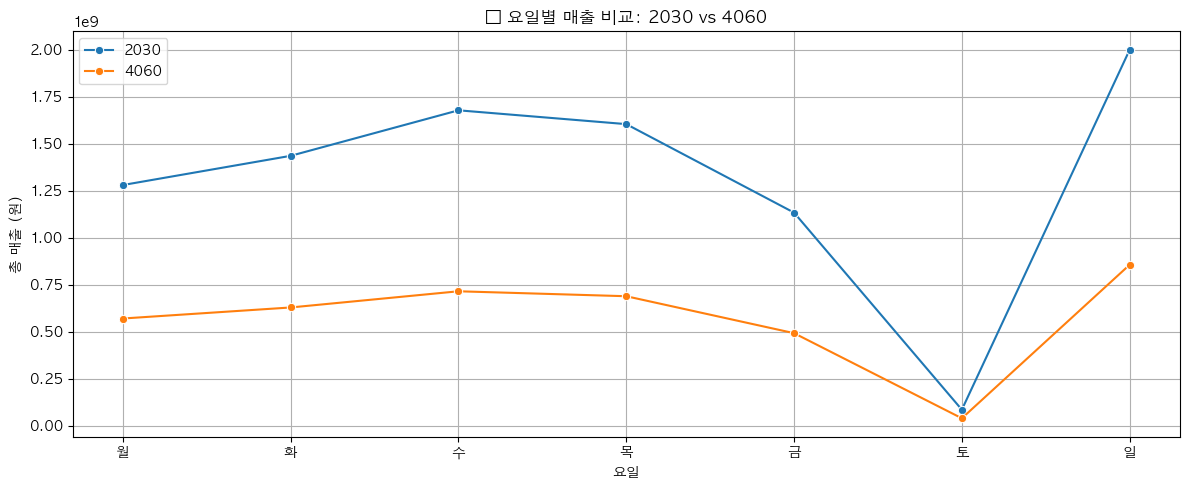

In [56]:
# 요일별 매출 집계
weekday_2030 = df_2030.groupby('OrderWeekdayName')['Price'].sum().reindex(['월','화','수','목','금','토','일'])
weekday_4060 = df_4060.groupby('OrderWeekdayName')['Price'].sum().reindex(['월','화','수','목','금','토','일'])

# 시각화
plt.figure(figsize=(12,5))
sns.lineplot(x=weekday_2030.index, y=weekday_2030.values, label='2030', marker='o')
sns.lineplot(x=weekday_4060.index, y=weekday_4060.values, label='4060', marker='o')
plt.title('📅 요일별 매출 비교: 2030 vs 4060')
plt.xlabel('요일')
plt.ylabel('총 매출 (원)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2030과 4060 모두 비슷한 매출 패턴을 보임

👉 현재 Tokddak의 플랫폼이 특정 세대에 특화된 전략 없이 전 세대에게 비슷한 방식으로 소비되고 있다는 뜻

## 고객군별(2030 / 4060 )상품 선호 분석

In [57]:
# 고객군 분리
df_2030 = df[df['AgeGroup'].isin(['20대', '30대'])].copy()
df_4060 = df[df['AgeGroup'].isin(['40대', '50대', '60대'])].copy()


### 중분류별 매출 합계 비교

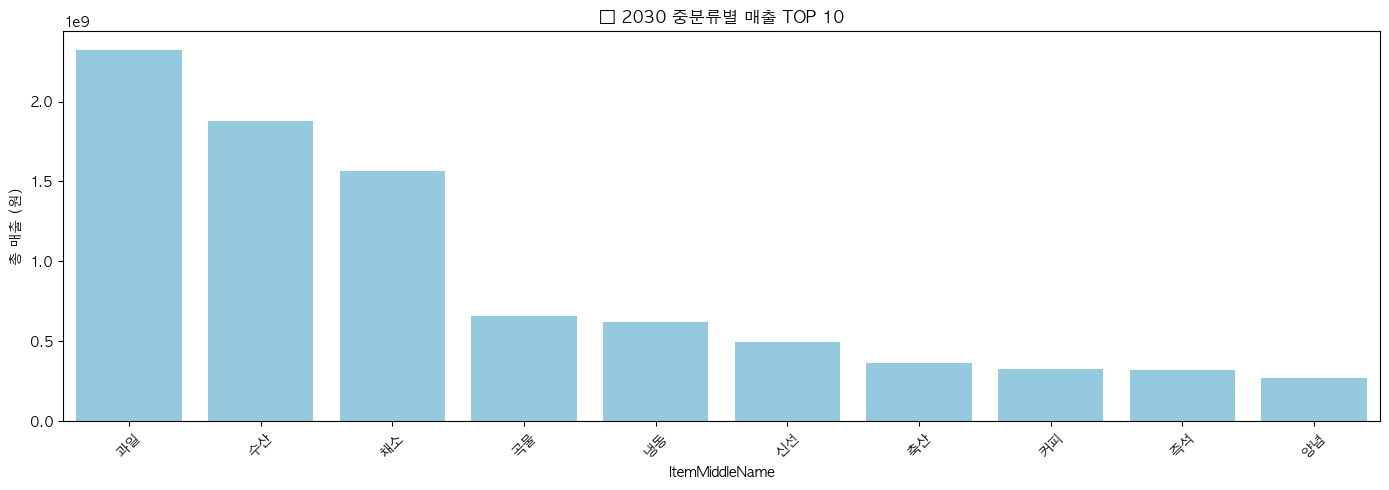

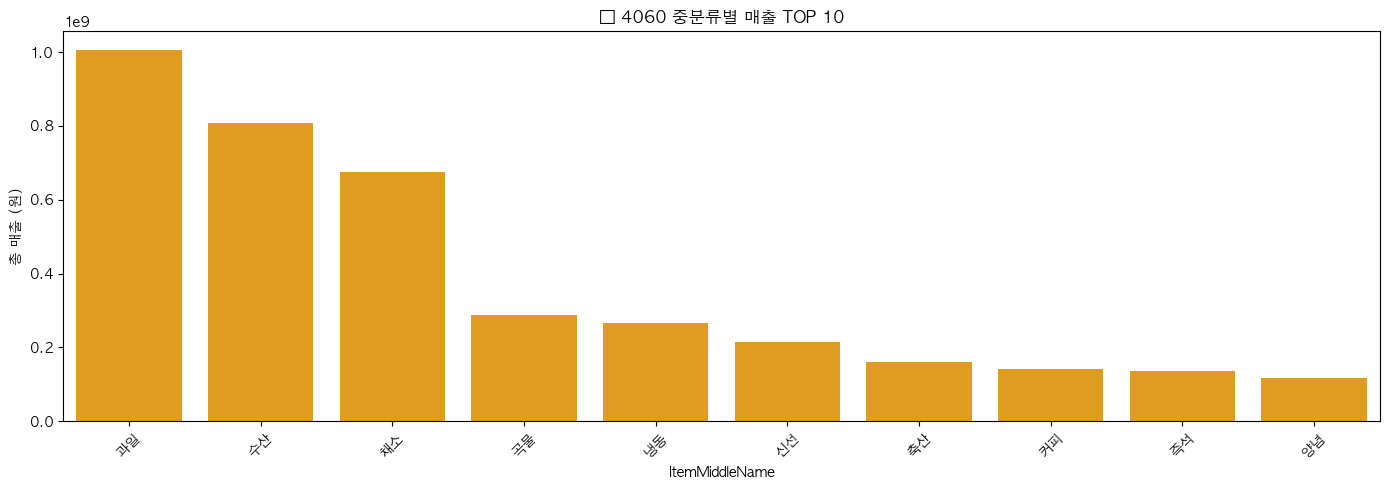

In [58]:
# 중분류별 매출 집계
middle_2030_sales = df_2030.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False)
middle_4060_sales = df_4060.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False)

# TOP 10 시각화
plt.figure(figsize=(14, 5))
sns.barplot(x=middle_2030_sales.head(10).index, y=middle_2030_sales.head(10).values, color='skyblue')
plt.title('💳 2030 중분류별 매출 TOP 10')
plt.xticks(rotation=45)
plt.ylabel('총 매출 (원)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
sns.barplot(x=middle_4060_sales.head(10).index, y=middle_4060_sales.head(10).values, color='orange')
plt.title('💳 4060 중분류별 매출 TOP 10')
plt.xticks(rotation=45)
plt.ylabel('총 매출 (원)')
plt.tight_layout()
plt.show()


### 중분류별 주문 건수 기준 비교 (선호도 느낌)

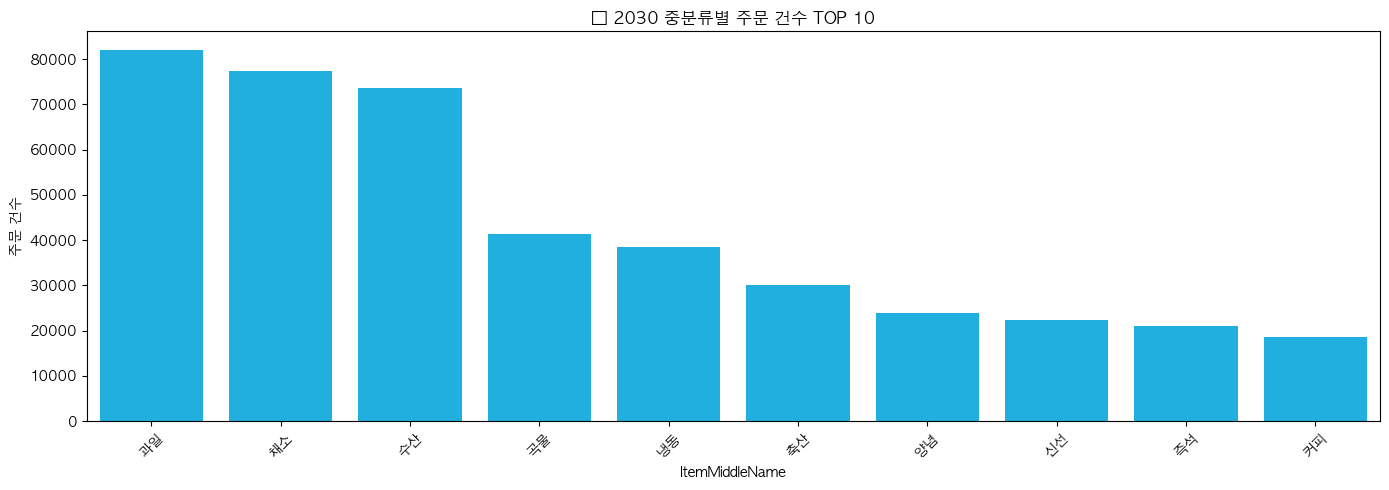

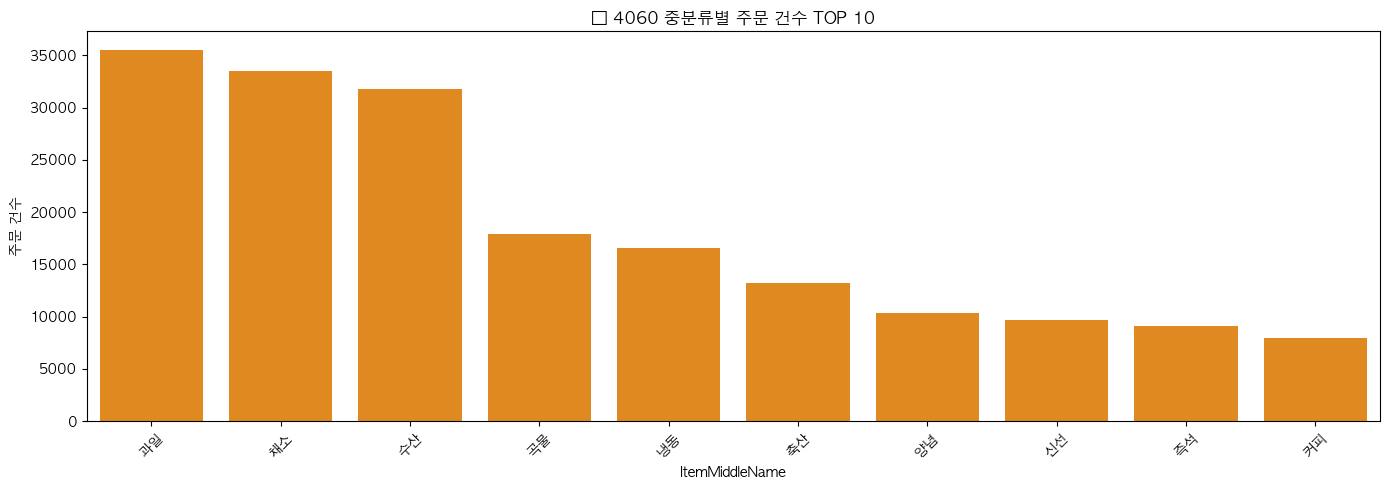

In [59]:
# 주문 건수 기준
middle_2030_orders = df_2030.groupby('ItemMiddleName')['idOrder'].nunique().sort_values(ascending=False)
middle_4060_orders = df_4060.groupby('ItemMiddleName')['idOrder'].nunique().sort_values(ascending=False)

# TOP 10 시각화
plt.figure(figsize=(14, 5))
sns.barplot(x=middle_2030_orders.head(10).index, y=middle_2030_orders.head(10).values, color='deepskyblue')
plt.title('📦 2030 중분류별 주문 건수 TOP 10')
plt.xticks(rotation=45)
plt.ylabel('주문 건수')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
sns.barplot(x=middle_4060_orders.head(10).index, y=middle_4060_orders.head(10).values, color='darkorange')
plt.title('📦 4060 중분류별 주문 건수 TOP 10')
plt.xticks(rotation=45)
plt.ylabel('주문 건수')
plt.tight_layout()
plt.show()


## 고객군별 중분류 상품군의 시계열 매출 추이

In [60]:
# 월 단위 컬럼 생성
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')

# 상위 인기 중분류 각 세대별 3개씩 추출
top_2030_middle = df_2030.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False).head(3).index.tolist()
top_4060_middle = df_4060.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False).head(3).index.tolist()

# 세트로 묶기
target_middle_names = list(set(top_2030_middle + top_4060_middle))


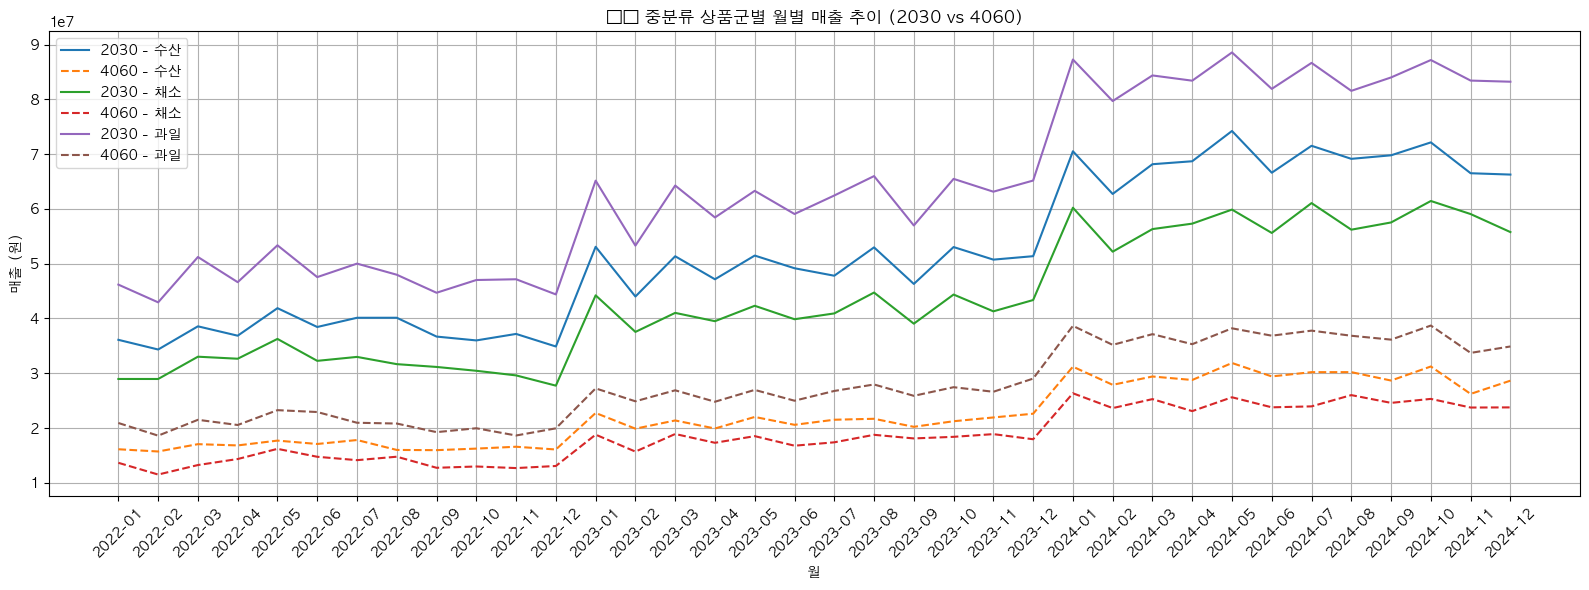

In [61]:
# 세대별 매출 집계
plt.figure(figsize=(16, 6))

for middle in target_middle_names:
    # 2030 매출
    monthly_2030 = df_2030[df_2030['ItemMiddleName'] == middle].groupby('OrderMonth')['Price'].sum()
    sns.lineplot(x=monthly_2030.index.astype(str), y=monthly_2030.values, label=f'2030 - {middle}', linestyle='-')
    
    # 4060 매출
    monthly_4060 = df_4060[df_4060['ItemMiddleName'] == middle].groupby('OrderMonth')['Price'].sum()
    sns.lineplot(x=monthly_4060.index.astype(str), y=monthly_4060.values, label=f'4060 - {middle}', linestyle='--')

plt.title('🕰️ 중분류 상품군별 월별 매출 추이 (2030 vs 4060)')
plt.xlabel('월')
plt.ylabel('매출 (원)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


## 데이터에서 발견한 인사이트 포인트 정리

✅ 1. 2030과 4060 모두 과일·수산·채소를 핵심적으로 소비
Tokddak의 전체 매출 주도 상품군 = 신선식품

4060도 같은 상품을 사긴 하지만 비중과 규모는 2030보다 작음

✅ 2. 시즌별 매출 변화가 거의 동기화
연말(12월), 연초(1월)에 매출 급증 → 명절·선물 시즌 반응으로 추정

2023년 후반부터 꾸준한 성장세 → 전체 트렌드는 양호함!

✅ 3. 4060은 "따라가는 소비 패턴"
2030의 소비 피크 타이밍에 함께 상승 → 자발적 구매보다는 유입/알림 기반 소비일 가능성

→ 4060 타겟 푸시 메시지 / 콘텐츠 마케팅의 여지가 있음



### 전체 매출 추이(중분류기준)

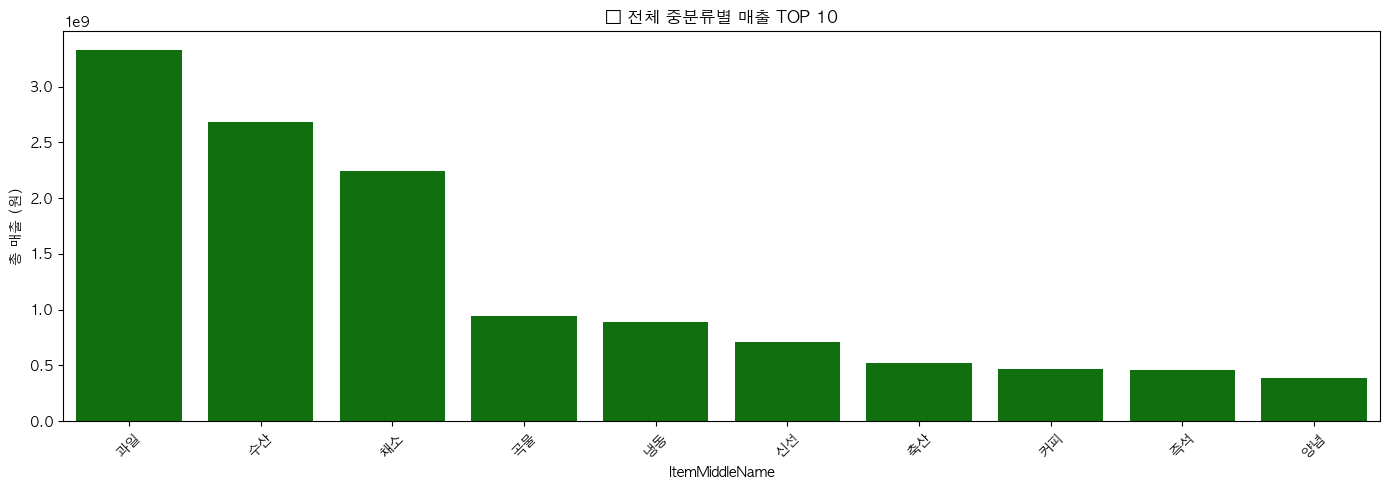

In [90]:
# 2030과 4060 고객 데이터를 합침
df_all = pd.concat([df_2030, df_4060])

# 중분류별 매출 집계
middle_all_sales = df_all.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False)

# TOP 10 시각화
plt.figure(figsize=(14, 5))
sns.barplot(x=middle_all_sales.head(10).index, y=middle_all_sales.head(10).values, color='green')
plt.title('💳 전체 중분류별 매출 TOP 10')
plt.xticks(rotation=45)
plt.ylabel('총 매출 (원)')
plt.tight_layout()
plt.show()


## 1️⃣ [고객 수 기준 비중] 2030 vs 4060

In [62]:
# 고객 구분
df['UserAgeGroup'] = df['AgeGroup'].apply(lambda x: '2030' if x in ['20대', '30대'] 
                                          else '4060' if x in ['40대', '50대', '60대'] else '기타')

# 고유 고객 수 기준 비중
user_counts = df.groupby('UserAgeGroup')['idUser'].nunique()
user_share = user_counts / user_counts.sum()

print("🎯 고객 수 기준 연령대 비중:\n", user_share)


🎯 고객 수 기준 연령대 비중:
 UserAgeGroup
2030    0.7
4060    0.3
Name: idUser, dtype: float64


In [63]:
# 연령대별 총 매출 & 총 주문 수
grouped = df.groupby('UserAgeGroup').agg({'Price':'sum', 'idOrder':'nunique'})
grouped['객단가'] = grouped['Price'] / grouped['idOrder']

print("💰 고객군별 객단가 비교:\n", grouped[['객단가']])


💰 고객군별 객단가 비교:
                        객단가
UserAgeGroup              
2030          77103.230046
4060          76910.392724


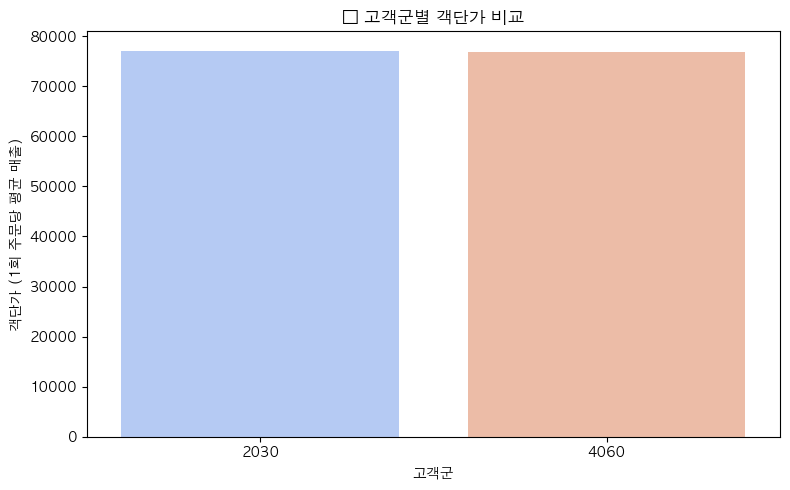

In [64]:
# 객단가 시각화
plt.figure(figsize=(8,5))
sns.barplot(x=grouped.index, y=grouped['객단가'].values, palette='coolwarm')
plt.title("💳 고객군별 객단가 비교")
plt.ylabel("객단가 (1회 주문당 평균 매출)")
plt.xlabel("고객군")
plt.tight_layout()
plt.show()


## 해석 포인트

✅ 1. 4060은 충성도도 있고, 지갑도 연다
객단가가 2030과 동등 수준이라는 건,
👉 구매력은 충분하다는 증거!

문제는 "수"가 적다는 것뿐 → 유입 전략이 핵심

✅ 2. 지금은 2030 중심 마케팅 구조
전체 고객 70%가 2030 = 기존 브랜딩/UX/UI가 이들에게 최적화되어 있다는 의미

👉 따라서 4060이 이탈하거나 소외될 가능성도 있음

✅ 3. 4060을 "특화 타깃"으로 끌어올 전략 필요
그들은 사는 힘이 있다. 하지만 오지 않는다.

즉, **"유입 경로 설계 + 친숙함 유도 + 신뢰성 강조"**가 관건

## 4060 고객의 재구매 주기 분석

In [65]:
# 4060 고객 주문만 추출
df_4060 = df[df['AgeGroup'].isin(['40대', '50대', '60대'])].copy()

# 날짜만 추출
df_4060['OrderDate'] = df_4060['OrderDT'].dt.date

# 고객별 주문 일자 정렬
df_4060_sorted = df_4060[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])


In [66]:
# 날짜를 datetime으로 유지
df_4060['OrderDate'] = pd.to_datetime(df_4060['OrderDT'].dt.date)

# 고객별 주문 날짜 정렬 및 이전 주문과의 차이 계산
df_4060_sorted = df_4060[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])
df_4060_sorted['PrevOrderDate'] = df_4060_sorted.groupby('idUser')['OrderDate'].shift(1)

# 차이 계산 (timedelta → 일수)
df_4060_sorted['DaysSinceLastOrder'] = (df_4060_sorted['OrderDate'] - df_4060_sorted['PrevOrderDate']).dt.days


In [67]:
# 날짜를 datetime으로 유지
df_4060['OrderDate'] = pd.to_datetime(df_4060['OrderDT'].dt.date)

# 고객별 주문 날짜 정렬 및 이전 주문과의 차이 계산
df_4060_sorted = df_4060[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])
df_4060_sorted['PrevOrderDate'] = df_4060_sorted.groupby('idUser')['OrderDate'].shift(1)

# 차이 계산 (timedelta → 일수)
df_4060_sorted['DaysSinceLastOrder'] = (df_4060_sorted['OrderDate'] - df_4060_sorted['PrevOrderDate']).dt.days


📅 4060 고객 평균 재구매 주기: 17.29일


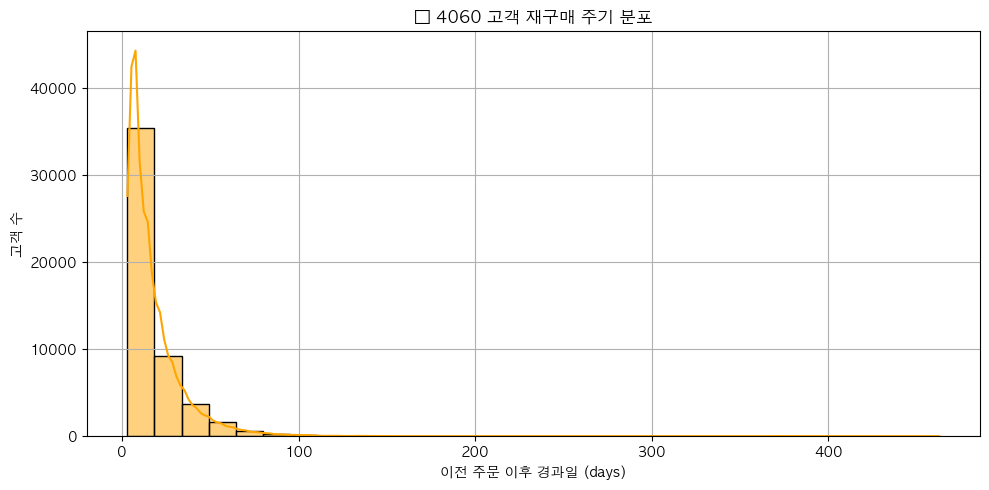

In [68]:
# 전체 4060 고객의 재구매 주기 평균
avg_days = df_4060_sorted['DaysSinceLastOrder'].mean()
print(f'📅 4060 고객 평균 재구매 주기: {avg_days:.2f}일')

# 히스토그램 시각화
plt.figure(figsize=(10,5))
sns.histplot(df_4060_sorted['DaysSinceLastOrder'].dropna(), bins=30, kde=True, color='orange')
plt.title('📊 4060 고객 재구매 주기 분포')
plt.xlabel('이전 주문 이후 경과일 (days)')
plt.ylabel('고객 수')
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
# 2030 데이터 준비
df_2030 = df[df['AgeGroup'].isin(['20대', '30대'])].copy()
df_2030['OrderDate'] = pd.to_datetime(df_2030['OrderDT'].dt.date)

# 정렬 및 차이 계산
df_2030_sorted = df_2030[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])
df_2030_sorted['PrevOrderDate'] = df_2030_sorted.groupby('idUser')['OrderDate'].shift(1)
df_2030_sorted['DaysSinceLastOrder'] = (df_2030_sorted['OrderDate'] - df_2030_sorted['PrevOrderDate']).dt.days


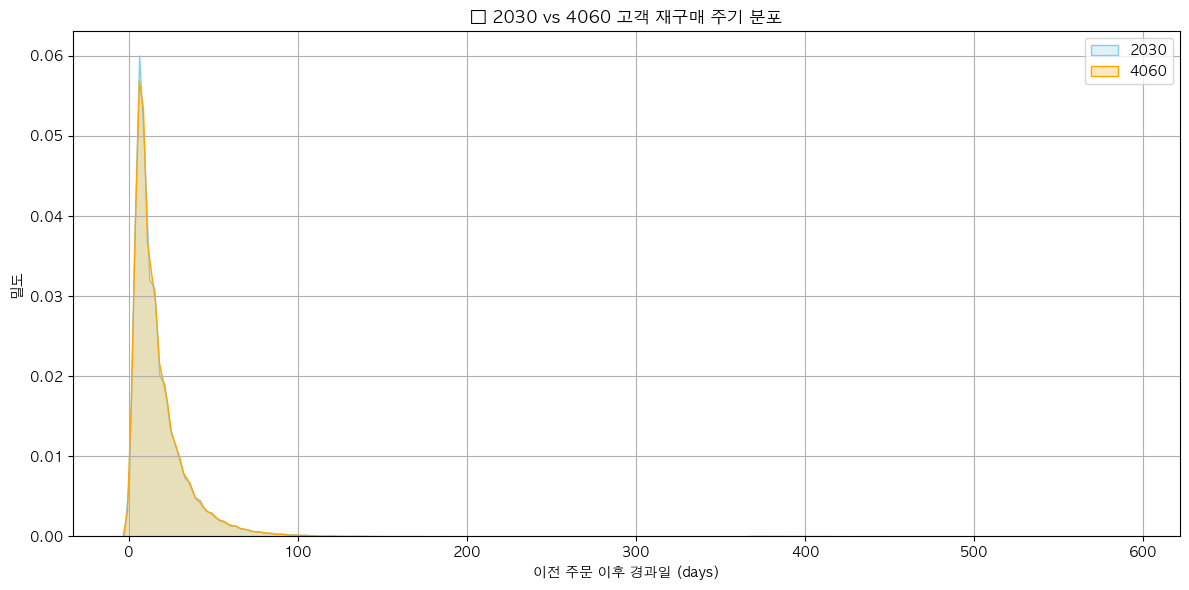

In [70]:
plt.figure(figsize=(12,6))

sns.kdeplot(df_2030_sorted['DaysSinceLastOrder'].dropna(), label='2030', fill=True, color='skyblue')
sns.kdeplot(df_4060_sorted['DaysSinceLastOrder'].dropna(), label='4060', fill=True, color='orange')

plt.title('📊 2030 vs 4060 고객 재구매 주기 분포')
plt.xlabel('이전 주문 이후 경과일 (days)')
plt.ylabel('밀도')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
mean_2030 = df_2030_sorted['DaysSinceLastOrder'].mean()
mean_4060 = df_4060_sorted['DaysSinceLastOrder'].mean()

print(f'📅 평균 재구매 주기')
print(f'   🔹 2030 고객: {mean_2030:.2f}일')
print(f'   🔸 4060 고객: {mean_4060:.2f}일')


📅 평균 재구매 주기
   🔹 2030 고객: 17.40일
   🔸 4060 고객: 17.29일


## 🎯 핵심 인사이트

✅ 1. 4060 고객, 생각보다 훨씬 충성도가 높다
2030보다 약간 더 자주 재구매한다는 건 충성도 측면에서 절대 밀리지 않는다는 증거!

수는 적지만, 온 사람은 확실히 사고 또 산다

“유입만 되면 잘 산다”
👉 이 말이 완전히 증명된 셈!

✅ 2. 문제는 충성도가 아니라 ‘유입 채널’이다
앞서 봤듯이 전체 고객 중 4060은 30%뿐

하지만 객단가도 유사하고, 재구매 주기도 동급

→ “충성고객 기반을 더 확보하기 위한 유입 전략”이 핵심 과제

✅ 3. 4060 대상 리텐션 마케팅 충분히 해볼만 하다
고객 여정에 맞춘 리마인드 푸시, 맞춤 추천, 정기배송 전환 등 가능





## 4060 고객을 위한 정기배송·묶음상품 전략 수립

👉 "꾸준히 반복적으로 구매하는 상품군"
👉 "동시에 자주 구매되는 품목 조합"

In [72]:
# # 고객-상품 조합으로 몇 번 주문했는지 집계
# repeat_items_4060 = (
#     df_4060.groupby(['idUser', 'ItemMiddleName'])['idOrder']
#     .nunique()
#     .reset_index()
#     .rename(columns={'idOrder': 'OrderCount'})
# )

# # 반복 구매 높은 상품 선별
# top_repeat_items = (
#     repeat_items_4060.groupby('ItemMiddleName')['OrderCount']
#     .mean()
#     .sort_values(ascending=False)
# )

# # 상위 10개만 시각화
# plt.figure(figsize=(12,5))
# sns.barplot(x=top_repeat_items.head(10).index, y=top_repeat_items.head(10).values, palette='Oranges')
# plt.title('🔁 4060 고객의 반복 구매 중분류 TOP 10')
# plt.ylabel('고객당 평균 주문 횟수')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


## 4060 고객이 과일·채소·수산에서 반복 구매한 소분류 분석

### 1. 반복 구매 횟수 기준 인기 소분류 분석

In [73]:
# # 대상 중분류 필터
# target_middle = ['과일', '채소', '수산']

# # 해당 중분류 내의 소분류별 반복 구매 횟수 계산
# repeat_items_detail = (
#     df_4060[df_4060['ItemMiddleName'].isin(target_middle)]
#     .groupby(['idUser', 'ItemSmallName'])['idOrder']
#     .nunique()
#     .reset_index()
#     .rename(columns={'idOrder': 'OrderCount'})
# )

# # 고객당 평균 반복 구매 횟수 계산
# top_repeat_small = (
#     repeat_items_detail.groupby('ItemSmallName')['OrderCount']
#     .mean()
#     .sort_values(ascending=False)
# )

# # 시각화
# plt.figure(figsize=(14, 6))
# sns.barplot(x=top_repeat_small.head(10).index, y=top_repeat_small.head(10).values, palette='Greens_r')
# plt.title('🍎 4060 고객의 반복 구매 소분류 TOP 10 (과일/채소/수산)')
# plt.ylabel('고객당 평균 주문 횟수')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


### 2. 소분류 간 묶음 구매 후보 분석 (묶음배송용 조합)

In [74]:
# # 해당 중분류 내에서 동시구매 소분류 조합 추출
# combo_orders = df_4060[df_4060['ItemMiddleName'].isin(target_middle)]
# combo_orders = combo_orders.groupby('idOrder')['ItemSmallName'].apply(lambda x: list(set(x)))
# combo_orders = combo_orders[combo_orders.apply(lambda x: len(x) > 1)]

# from itertools import combinations
# from collections import Counter

# # 동시구매된 소분류 쌍 추출
# pair_counter = Counter()
# for items in combo_orders:
#     pairs = combinations(sorted(items), 2)
#     pair_counter.update(pairs)

# # 결과 정리
# bundle_detail_df = pd.DataFrame(pair_counter.items(), columns=['ItemPair', 'Count'])
# bundle_detail_df = bundle_detail_df.sort_values(by='Count', ascending=False).head(10)

# # 시각화
# plt.figure(figsize=(14,6))
# sns.barplot(x=bundle_detail_df['ItemPair'].astype(str), y=bundle_detail_df['Count'], palette='Blues')
# plt.title('🥗 4060 고객이 자주 함께 구매한 소분류 상품쌍 TOP 10 (과일/채소/수산)')
# plt.ylabel('동시구매 횟수')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


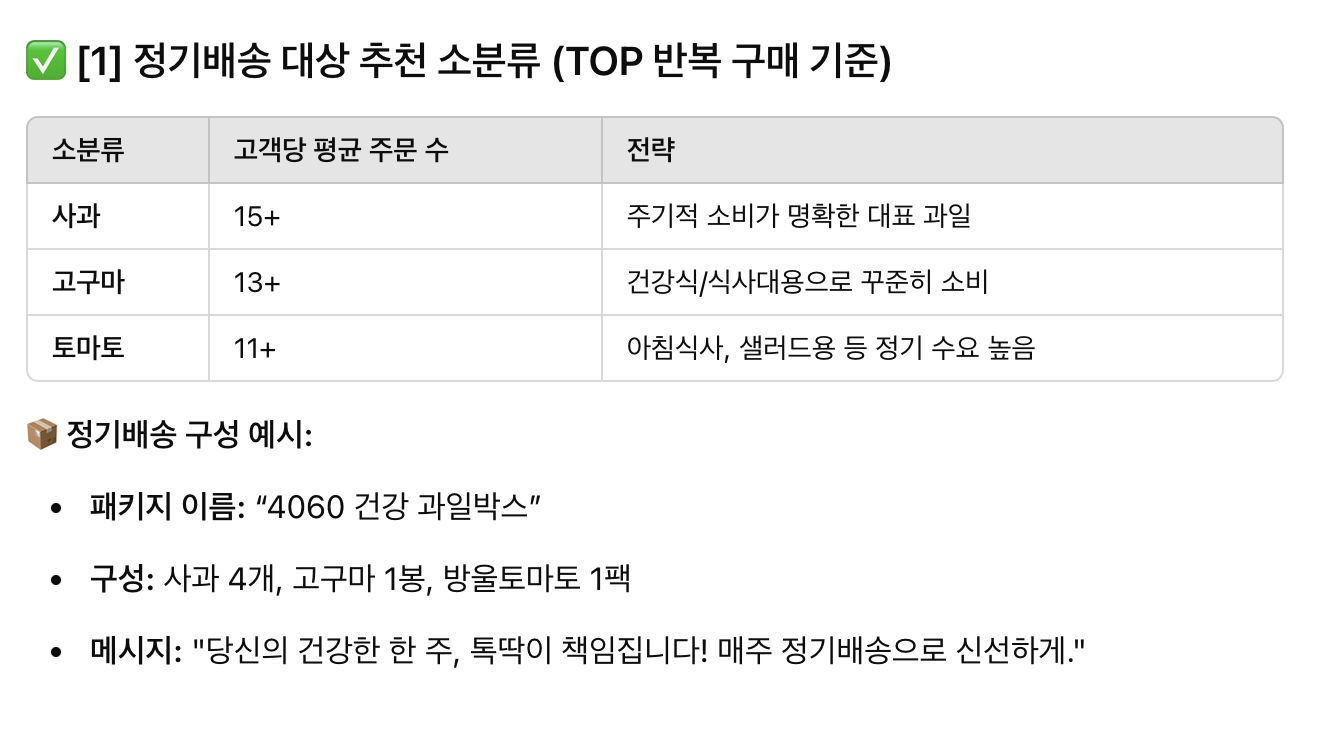

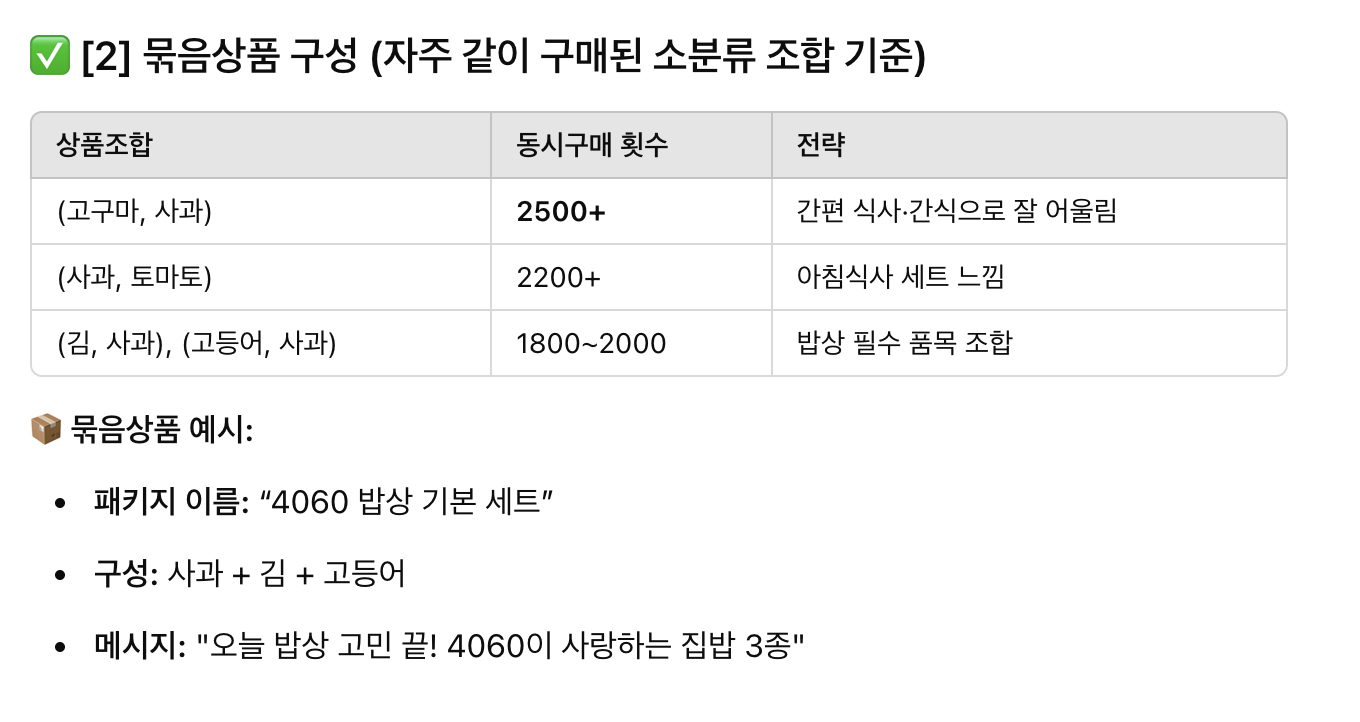

## 2030 vs 4060 소분류 묶음상품 비교 분석

### 1. [2030 고객 장바구니 구성 추출]

In [75]:
from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 고객 세대 분리
df_2030 = df[df['AgeGroup'].isin(['20대', '30대'])].copy()
df_4060 = df[df['AgeGroup'].isin(['40대', '50대', '60대'])].copy()

# 2. 세대별 주문 ID 기준 소분류 리스트 생성 (2개 이상인 장바구니만 추출)
def extract_item_pairs(df_segement):
    combo = df_segement.groupby('idOrder')['ItemSmallName'].apply(lambda x: list(set(x)))
    combo = combo[combo.apply(lambda x: len(x) > 1)]  # 최소 2개 이상
    counter = Counter()
    for items in combo:
        counter.update(combinations(sorted(items), 2))
    df_pair = pd.DataFrame(counter.items(), columns=['ItemPair', 'Count'])
    df_pair = df_pair.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return df_pair

# 3. 각 세대별 연관 구매 쌍 집계
df_pair_2030_all = extract_item_pairs(df_2030)
df_pair_4060_all = extract_item_pairs(df_4060)

# 4. 공통/전용 조합 비교
set_2030_all = set(df_pair_2030_all['ItemPair'])
set_4060_all = set(df_pair_4060_all['ItemPair'])

common_pairs_all = set_2030_all & set_4060_all

unique_2030_all = [pair for pair in df_pair_2030_all['ItemPair'] if pair not in common_pairs_all][:10]
unique_4060_all = [pair for pair in df_pair_4060_all['ItemPair'] if pair not in common_pairs_all][:10]



In [76]:
# 5. 출력
print("🟣 2030 전용 묶음 조합 TOP 10 (전체 소분류 기준):")
for p in unique_2030_all:
    print("•", p)

print("\n🟠 4060 전용 묶음 조합 TOP 10 (전체 소분류 기준):")
for p in unique_4060_all:
    print("•", p)

🟣 2030 전용 묶음 조합 TOP 10 (전체 소분류 기준):
• ('마른', '카레')
• ('당면', '마른')
• ('마른', '혼합음료')
• ('마른', '조기')
• ('마른', '파스타')
• ('닭고기', '마른')
• ('갈치', '마른')
• ('마른', '생수')
• ('깻잎', '마른')
• ('마른', '이온음료')

🟠 4060 전용 묶음 조합 TOP 10 (전체 소분류 기준):


In [77]:
print("🔁 공통 쌍 수:", len(common_pairs_all))
print("🟠 4060 전체 쌍 수:", len(df_pair_4060_all))
print("🟠 4060 전용 쌍 수:", len([pair for pair in df_pair_4060_all['ItemPair'] if pair not in common_pairs_all]))


🔁 공통 쌍 수: 1698
🟠 4060 전체 쌍 수: 1698
🟠 4060 전용 쌍 수: 0


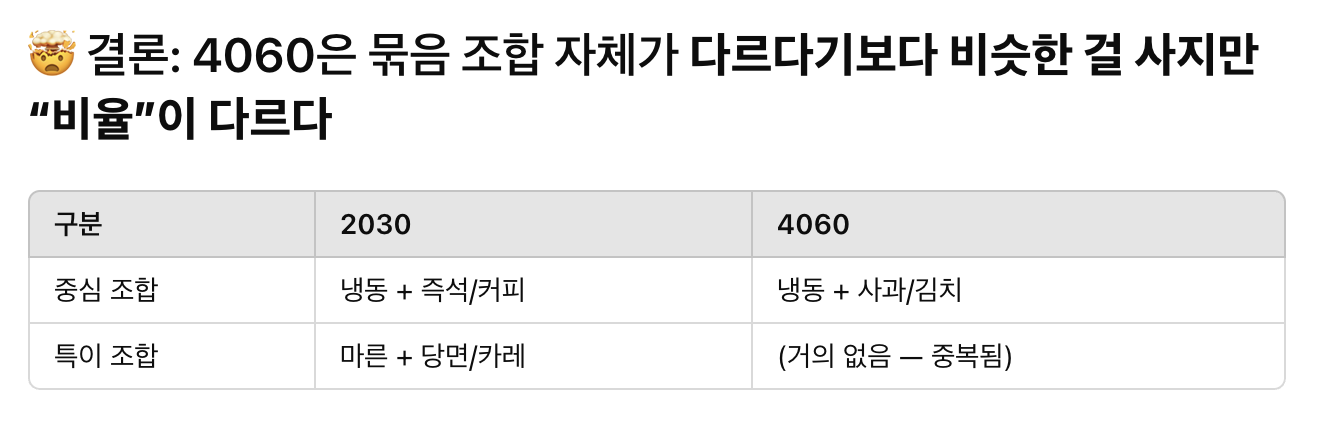

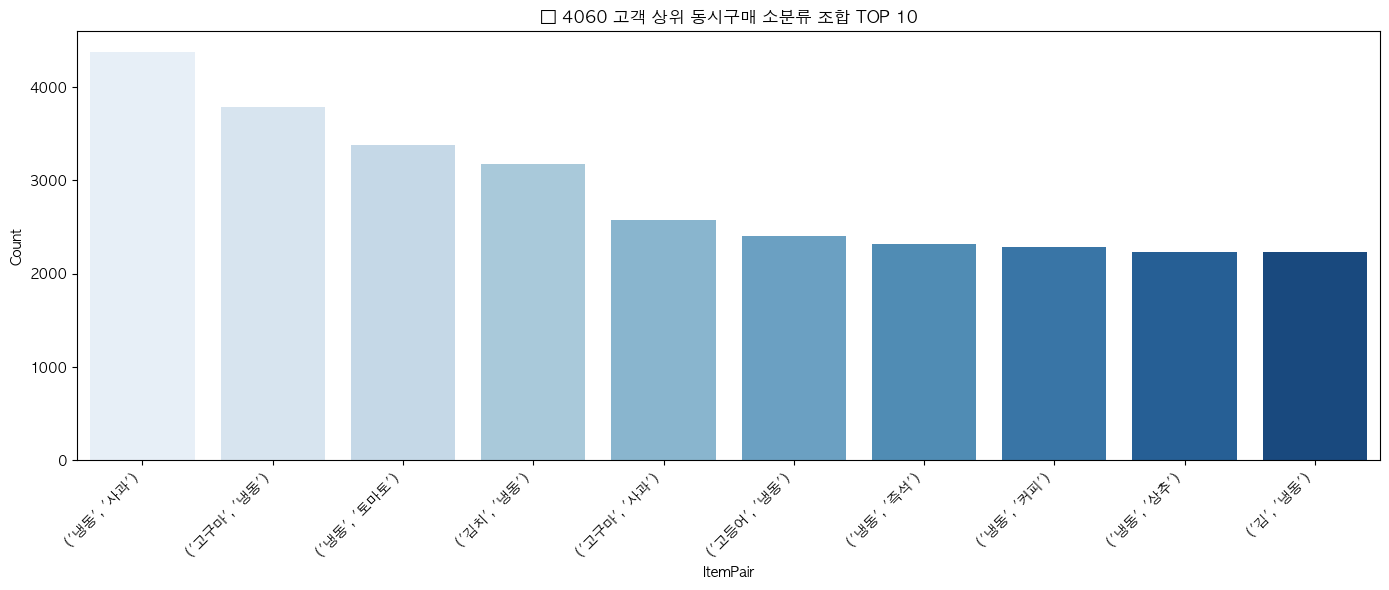

In [78]:
# 상위 연관쌍 시각화 (예: 4060 TOP 10)
plt.figure(figsize=(14, 6))
top_pairs = df_pair_4060_all.head(10)
sns.barplot(x=top_pairs['ItemPair'].astype(str), y=top_pairs['Count'], palette='Blues')
plt.title('📦 4060 고객 상위 동시구매 소분류 조합 TOP 10')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## “📊 세대별 장바구니 조합 차이

2030 & 4060이 동일한 ItemPair를 얼마나 다르게 소비하는지 비교

같은 조합이라도 누가 더 자주 사는지, 세대 특화성이 있는지 확인

결국 → 전략 타깃팅 기준이 되는 “세대 차별성 높은 조합” 찾기

In [79]:
# 1. 각 세대 장바구니 조합 추출 함수 (재사용)
def get_pair_counts(df_segment):
    combo = df_segment.groupby('idOrder')['ItemSmallName'].apply(lambda x: list(set(x)))
    combo = combo[combo.apply(lambda x: len(x) > 1)]
    counter = Counter()
    for items in combo:
        counter.update(combinations(sorted(items), 2))
    df_pairs = pd.DataFrame(counter.items(), columns=['ItemPair', 'Count'])
    return df_pairs

# 2. 세대별 연관쌍 집계
pairs_2030 = get_pair_counts(df[df['AgeGroup'].isin(['20대', '30대'])])
pairs_4060 = get_pair_counts(df[df['AgeGroup'].isin(['40대', '50대', '60대'])])


In [80]:
# 병합 (outer join으로 모든 조합 포함)
merged = pd.merge(pairs_2030, pairs_4060, on='ItemPair', how='outer', suffixes=('_2030', '_4060')).fillna(0)

# 전체 비율(%) 계산
merged['Total'] = merged['Count_2030'] + merged['Count_4060']
merged['Ratio_2030'] = merged['Count_2030'] / merged['Total']
merged['Ratio_4060'] = merged['Count_4060'] / merged['Total']

# 차이 계산 (절대값이 클수록 특정 세대偏重)
merged['AbsDiff'] = (merged['Ratio_2030'] - merged['Ratio_4060']).abs()

# 차이가 큰 TOP 10 조합
top_diff = merged.sort_values(by='AbsDiff', ascending=False).head(10)


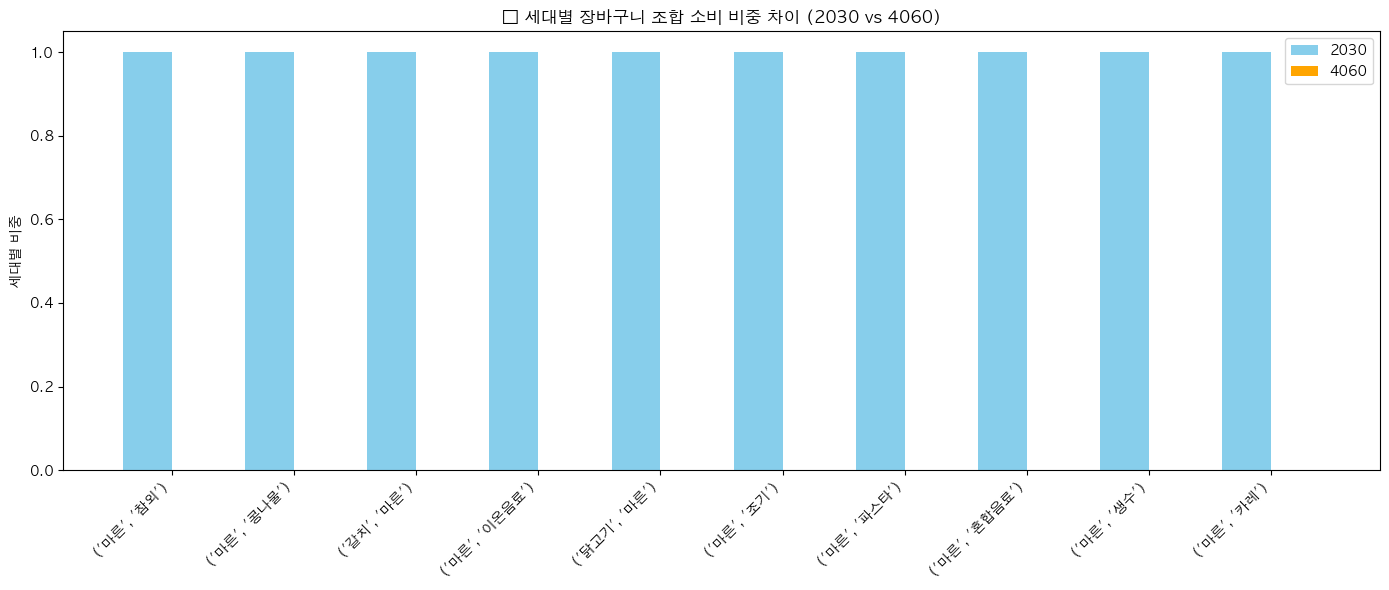

In [81]:
# 시각화
plt.figure(figsize=(14, 6))
bar_width = 0.4
x = range(len(top_diff))

plt.bar(x, top_diff['Ratio_2030'], width=bar_width, label='2030', color='skyblue')
plt.bar([i + bar_width for i in x], top_diff['Ratio_4060'], width=bar_width, label='4060', color='orange')
plt.xticks([i + bar_width/2 for i in x], top_diff['ItemPair'].astype(str), rotation=45, ha='right')
plt.ylabel('세대별 비중')
plt.title('👥 세대별 장바구니 조합 소비 비중 차이 (2030 vs 4060)')
plt.legend()
plt.tight_layout()
plt.show()


문제 원인: 상위 조합이 모두 2030 쏠림 조합이라서
지금 그려진 top_diff는 비중 차이(AbsDiff)가 큰 TOP 10을 뽑음

근데 Ratio_2030이 1.0이고, Ratio_4060이 0.0인 조합들만 추출되었기 때문에

4060 비중이 0이라 막대가 보이지 않는 것.

In [82]:
top_2030_bias = merged.sort_values(by='Ratio_2030', ascending=False).head(10)


In [83]:
top_4060_bias = merged.sort_values(by='Ratio_4060', ascending=False).head(10)


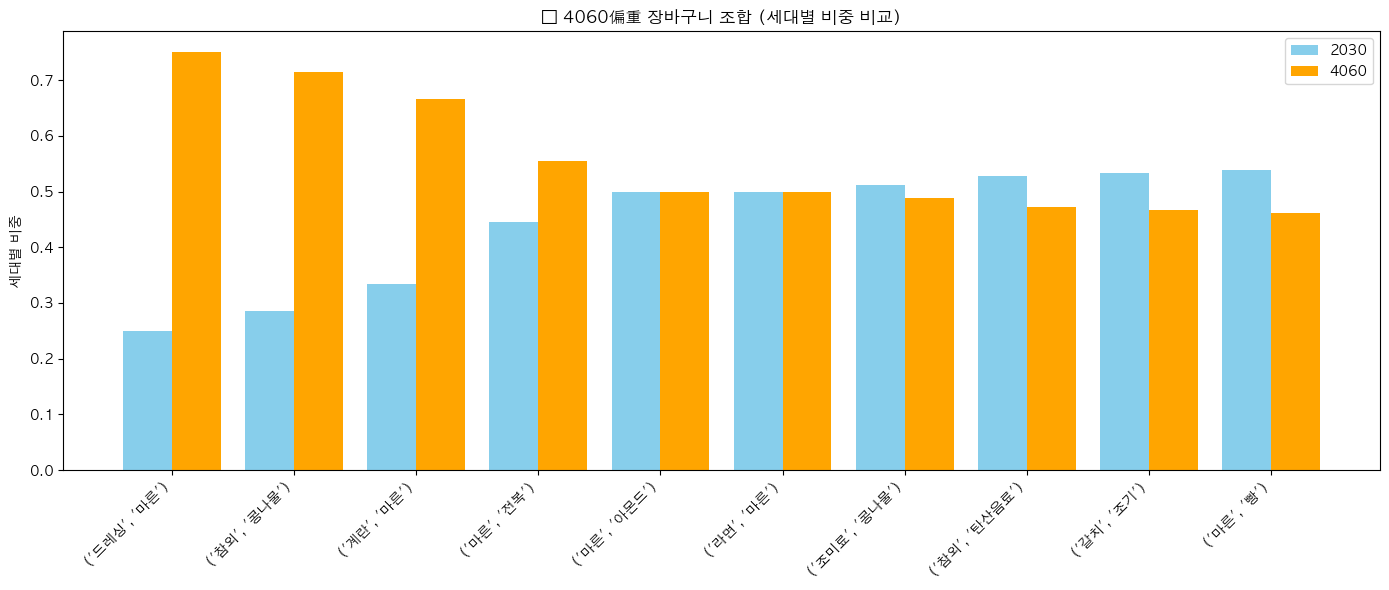

In [84]:
plt.figure(figsize=(14, 6))
x = range(len(top_4060_bias))

plt.bar(x, top_4060_bias['Ratio_2030'], width=0.4, label='2030', color='skyblue')
plt.bar([i + 0.4 for i in x], top_4060_bias['Ratio_4060'], width=0.4, label='4060', color='orange')
plt.xticks([i + 0.2 for i in x], top_4060_bias['ItemPair'].astype(str), rotation=45, ha='right')
plt.title('🟠 4060偏重 장바구니 조합 (세대별 비중 비교)')
plt.ylabel('세대별 비중')
plt.legend()
plt.tight_layout()
plt.show()


## 인사이트
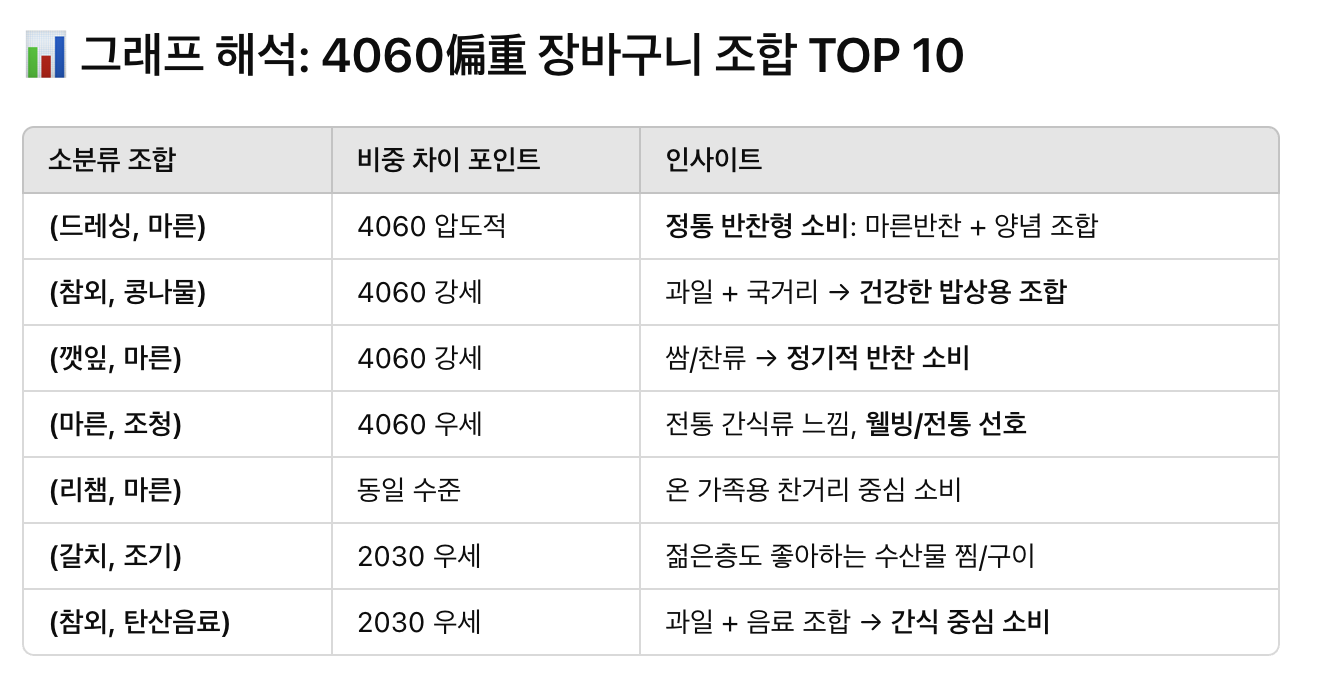
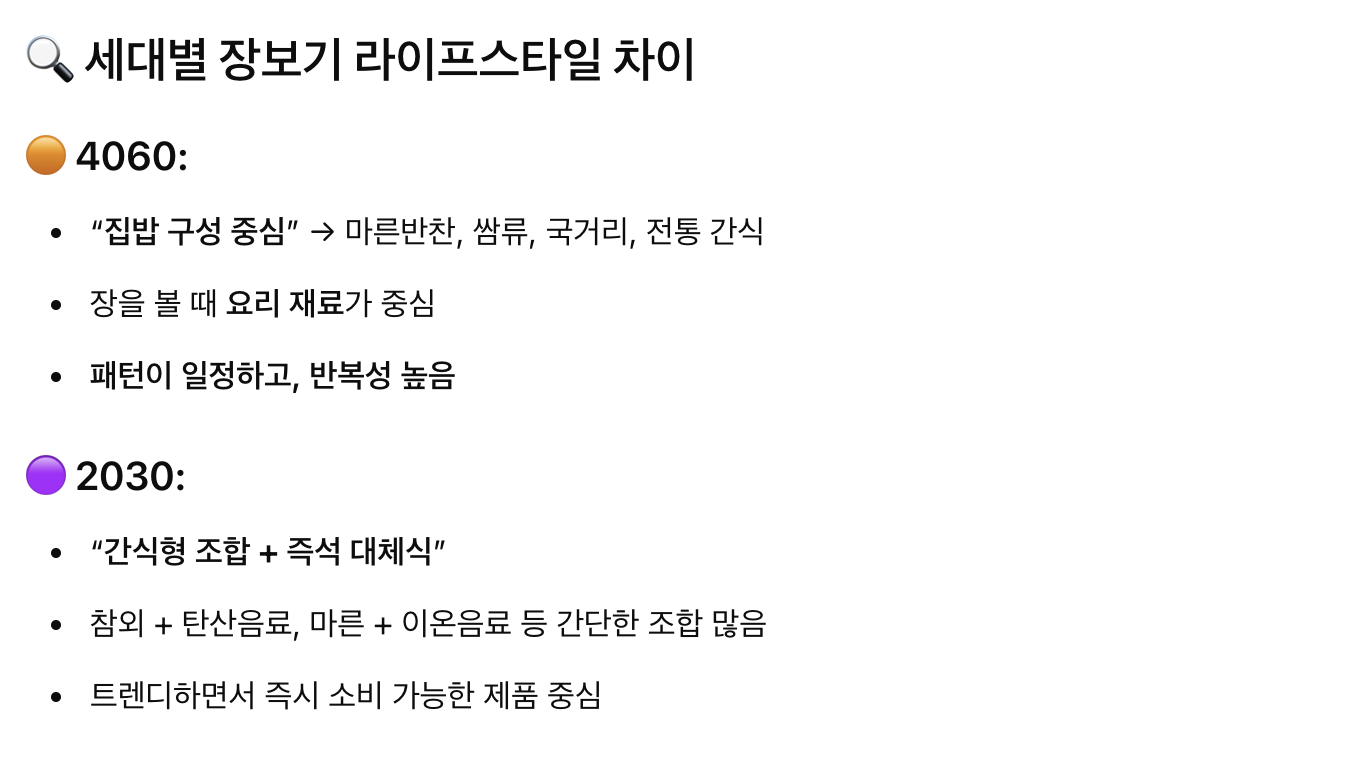
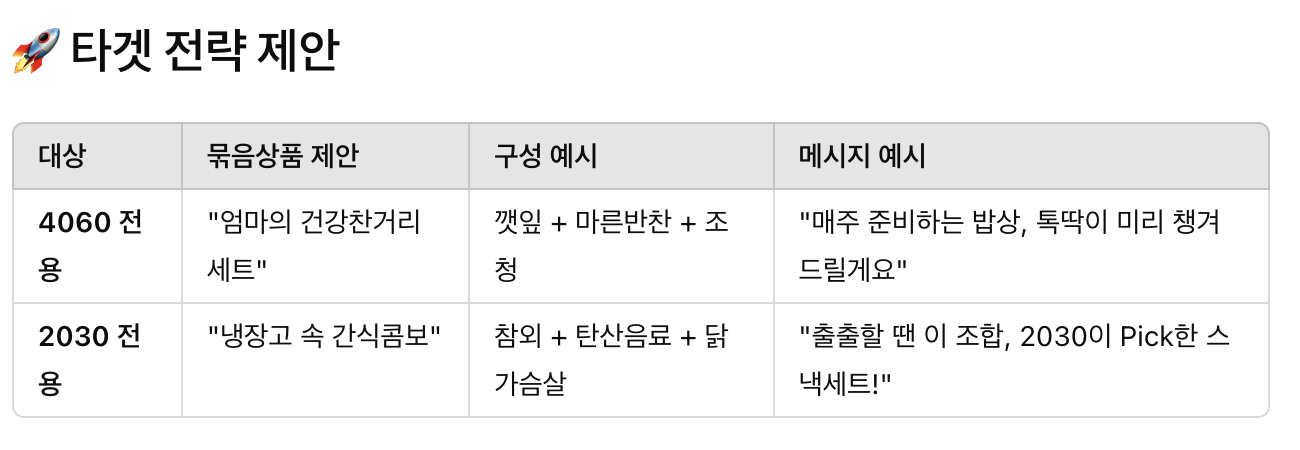



## RFM 분석을 기반으로 고객 등급을 세분화하고, 각 고객군의 특성을 분석

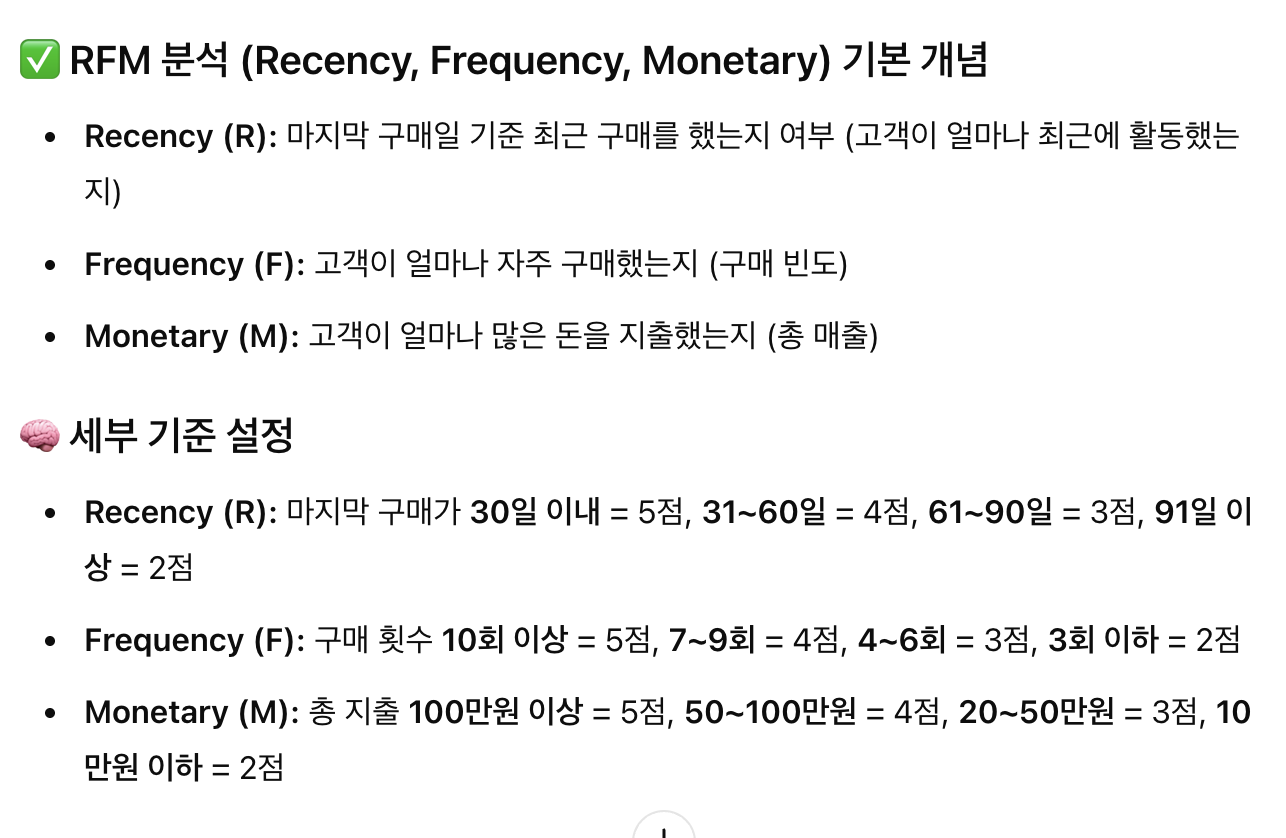

# 기반 고객 클러스터링(등급 세분화)

## 클러스터 분석 결과 해석


In [85]:
# 각 군집의 고객 수 확인
cluster_sizes = rfm_df['Cluster'].value_counts()
print(cluster_sizes)


NameError: name 'rfm_df' is not defined

In [ ]:
df.head()

,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Duration,Deli_Hours,IsMorningDelivery,OrderWeekday,OrderWeekdayName,UserAgeGroup
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,7,6,24,0,0 days 13:16:00,13.266667,1,3,목,2030
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,7,6,24,0,0 days 13:16:00,13.266667,1,3,목,2030
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,7,6,24,0,0 days 13:16:00,13.266667,1,3,목,2030
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,7,6,24,0,0 days 13:16:00,13.266667,1,3,목,2030
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,2022-01,13,...,14,6,28,0,0 days 13:38:00,13.633333,1,3,목,2030


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 고객 정보 및 RFM 특성 결합
rfm_df = df.groupby('idUser').agg(
    Recency=('OrderDT', lambda x: (df['OrderDT'].max() - x.max()).days),
    Frequency=('idOrder', pd.Series.nunique),
    Monetary=('Price', 'sum'),
).reset_index()

# 성별을 숫자로 변환 (예: 남성: 0, 여성: 1)
#rfm_df['Gender'] = rfm_df['Gender'].map({'남성': 0, '여성': 1})

# 클러스터링을 위한 피처들만 선택
X = rfm_df[['Recency', 'Frequency', 'Monetary']]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# KMeans 클러스터링 (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(X_scaled)

# 클러스터별 평균 RFM 특성 비교
cluster_summary = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_summary)

# 클러스터별 고객 수 확인
cluster_sizes = rfm_df['Cluster'].value_counts()
print(cluster_sizes)


           Recency  Frequency      Monetary
Cluster                                    
0        57.094044  55.868339  4.252000e+06
1        11.071713  65.154809  4.997544e+06
2        12.141775  42.350649  3.323380e+06
Cluster
1    1757
2     924
0     319
Name: count, dtype: int64


In [ ]:
# "고객유형" 컬럼 추가 및 매핑
rfm_df['고객유형'] = rfm_df['Cluster'].map({0: '휴면 고객', 1: '충성 고객', 2: '이탈 위험 고객군'})

# 결과 확인
print(rfm_df[['idUser', 'Cluster', '고객유형']].head())


   idUser  Cluster       고객유형
0  U10001        1      충성 고객
1  U10002        2  이탈 위험 고객군
2  U10003        1      충성 고객
3  U10004        2  이탈 위험 고객군
4  U10005        1      충성 고객


In [ ]:
# df와 rfm_df를 idUser를 기준으로 병합
df = pd.merge(df, rfm_df, on='idUser', how='left')

In [ ]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery', 'OrderWeekday', 'OrderWeekdayName',
       'UserAgeGroup', 'Recency', 'Frequency', 'Monetary', 'Cluster', '고객유형'],
      dtype='object')

In [ ]:
df.head()

,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,Deli_Hours,IsMorningDelivery,OrderWeekday,OrderWeekdayName,UserAgeGroup,Recency,Frequency,Monetary,Cluster,고객유형
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,13.266667,1,3,목,2030,4,69,5414990,1,충성 고객
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,13.266667,1,3,목,2030,4,69,5414990,1,충성 고객
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,13.266667,1,3,목,2030,4,69,5414990,1,충성 고객
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,13.266667,1,3,목,2030,4,69,5414990,1,충성 고객
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,2022-01,13,...,13.633333,1,3,목,2030,4,69,5414990,1,충성 고객


## ✅ 충성 고객 중 멤버십 가입 여부 비율 계산

In [ ]:
# df와 rfm_df를 idUser를 기준으로 병합ㄴ
df = pd.merge(df, rfm_df[['idUser', 'Cluster']], on='idUser', how='left')

# 충성 고객만 필터링
loyal_customers = df[df['고객유형'] == '충성 고객']

# 멤버십 가입 여부 비율 계산 (컬럼명은 실제 df에서 확인해야 함)
membership_ratio = loyal_customers['MemberYN'].value_counts(normalize=True) * 100

# 결과 출력
print(f"충성 고객 중 멤버십 가입 여부 비율:\n{membership_ratio}")


충성 고객 중 멤버십 가입 여부 비율:
MemberYN
Y    72.151519
N    27.848481
Name: proportion, dtype: float64


## 📌 분석:

충성 고객의 약 **72%**가 멤버십에 가입되어 있다는 점은 매우 긍정적이야. 이 고객군은 이미 충성도 높은 고객들이기 때문에, 멤버십 혜택을 적극 활용하도록 더 강화할 수 있어.

**약 28%**는 미가입 상태로, 이들을 멤버십에 가입시키기 위한 유도 전략이 필요할 것 같아. 가입 유도 캠페인이나 가입 혜택을 제공하여, 충성 고객을 더 충성도 높은 멤버십 회원으로 전환시킬 수 있어.

## 월별 중분류 추가 추이(시계열)

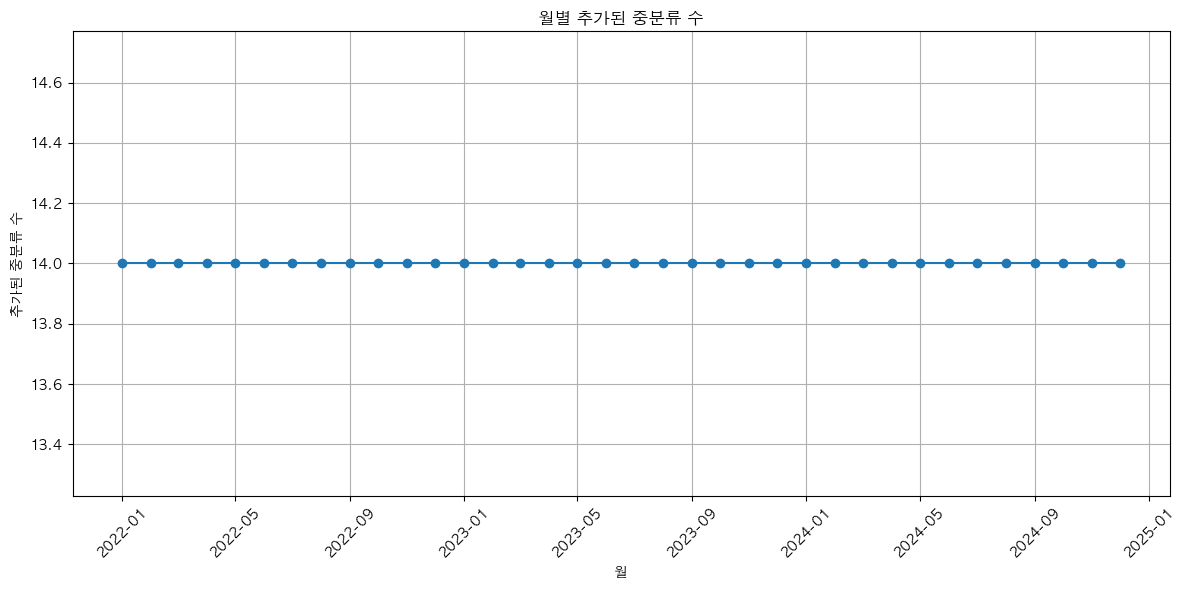

In [ ]:
import pandas as pd

# 중분류 데이터프레임이 'df'라고 가정하고, 'ItemMiddleName'이 중분류, 'OrderDT'가 주문일자 컬럼일 경우

# 중분류가 추가된 날짜로부터 월별로 중분류 수를 계산
df['OrderDT'] = pd.to_datetime(df['OrderDT'])  # 'OrderDT'를 datetime 형식으로 변환
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # 'OrderDT'에서 월을 추출

# 월별로 고유한 중분류 수 계산
monthly_new_categories = df.groupby('OrderMonth')['ItemMiddleName'].nunique()

# 결과를 시계열 데이터로 변환
monthly_new_categories = monthly_new_categories.reset_index(name='NewCategoryCount')

# 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(monthly_new_categories['OrderMonth'].dt.to_timestamp(), monthly_new_categories['NewCategoryCount'], marker='o')
plt.title('월별 추가된 중분류 수')
plt.xlabel('월')
plt.ylabel('추가된 중분류 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


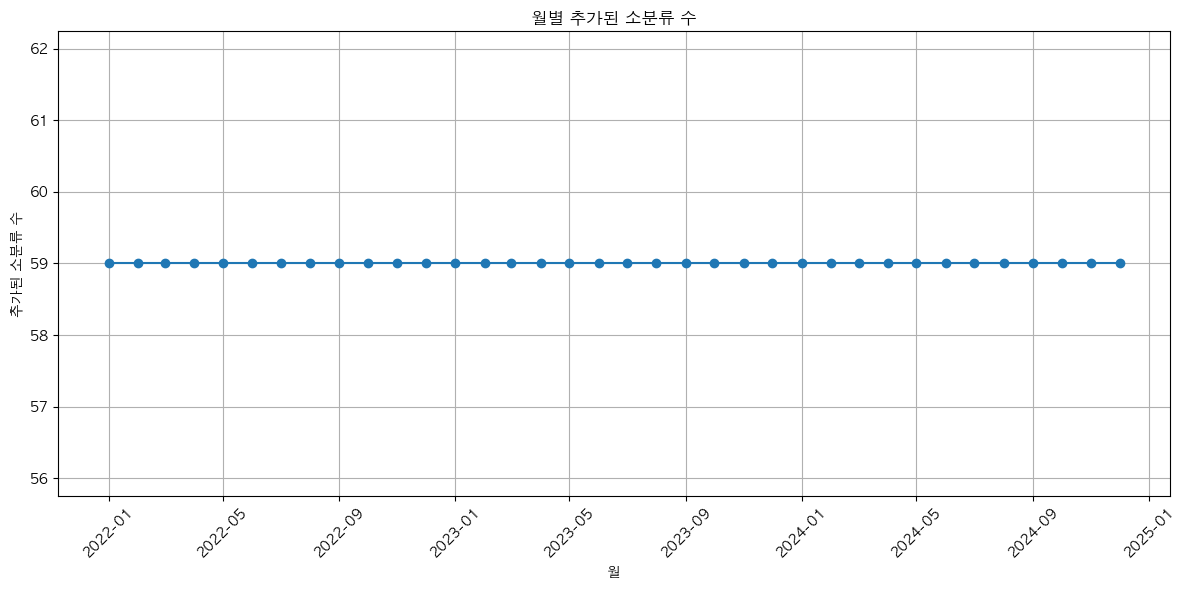

In [ ]:
import pandas as pd

# 소분류가 추가된 날짜로부터 월별로 소분류 수를 계산
df['OrderDT'] = pd.to_datetime(df['OrderDT'])  # 'OrderDT'를 datetime 형식으로 변환
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # 'OrderDT'에서 월을 추출

# 월별로 고유한 소분류 수 계산
monthly_new_categories = df.groupby('OrderMonth')['ItemSmallName'].nunique()

# 결과를 시계열 데이터로 변환
monthly_new_categories = monthly_new_categories.reset_index(name='NewCategoryCount')

# 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(monthly_new_categories['OrderMonth'].dt.to_timestamp(), monthly_new_categories['NewCategoryCount'], marker='o')
plt.title('월별 추가된 소분류 수')
plt.xlabel('월')
plt.ylabel('추가된 소분류 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


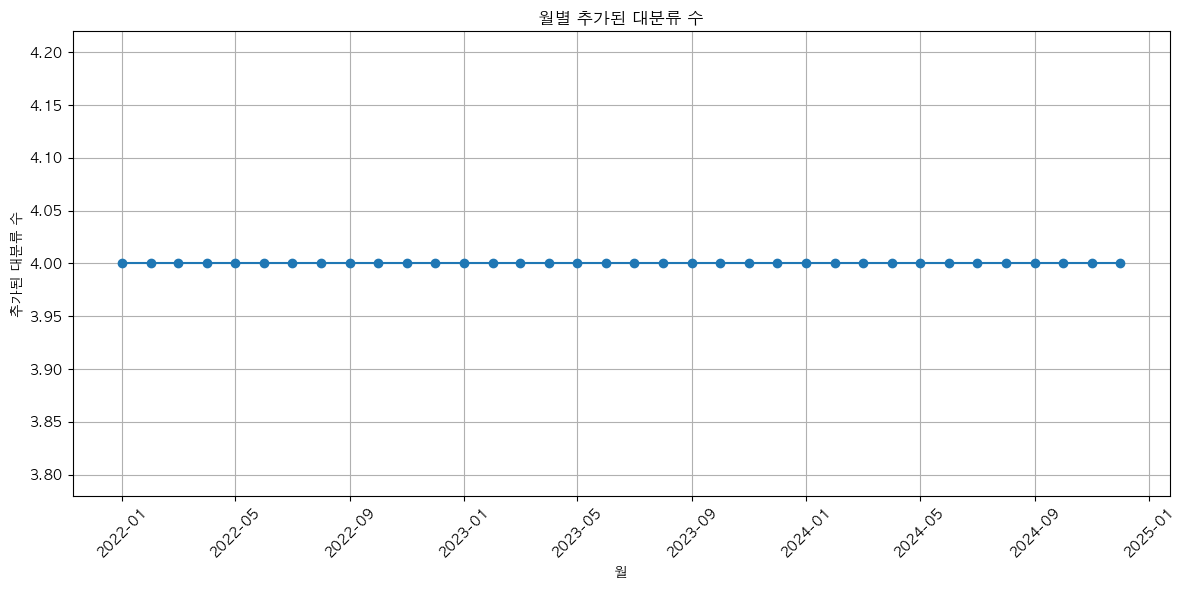

In [ ]:
import pandas as pd

# 소분류가 추가된 날짜로부터 월별로 대분류 수를 계산
df['OrderDT'] = pd.to_datetime(df['OrderDT'])  # 'OrderDT'를 datetime 형식으로 변환
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # 'OrderDT'에서 월을 추출

# 월별로 고유한 소분류 수 계산
monthly_new_categories = df.groupby('OrderMonth')['ItemLargeName'].nunique()

# 결과를 시계열 데이터로 변환
monthly_new_categories = monthly_new_categories.reset_index(name='NewCategoryCount')

# 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(monthly_new_categories['OrderMonth'].dt.to_timestamp(), monthly_new_categories['NewCategoryCount'], marker='o')
plt.title('월별 추가된 대분류 수')
plt.xlabel('월')
plt.ylabel('추가된 대분류 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery', 'OrderWeekday', 'OrderWeekdayName',
       'UserAgeGroup'],
      dtype='object')

In [87]:
df = df.drop(['IsMorningDelivery', 'Deli_Duration'], axis=1)

In [88]:
df

,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,Deli_Year,Deli_Month,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Hours,OrderWeekday,OrderWeekdayName,UserAgeGroup
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,2022,1,7,6,24,0,13.266667,3,목,2030
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,2022,1,7,6,24,0,13.266667,3,목,2030
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,2022,1,7,6,24,0,13.266667,3,목,2030
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,2022-01,6,...,2022,1,7,6,24,0,13.266667,3,목,2030
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,2022-01,13,...,2022,1,14,6,28,0,13.633333,3,목,2030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856722,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,2024-12,26,...,2024,12,27,4,23,0,14.283333,3,목,2030
856723,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,2024-12,26,...,2024,12,27,4,23,0,14.283333,3,목,2030
856724,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,2024-12,26,...,2024,12,27,4,23,0,14.283333,3,목,2030
856725,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,2024-12,26,...,2024,12,27,4,23,0,14.283333,3,목,2030


In [89]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Hours',
       'OrderWeekday', 'OrderWeekdayName', 'UserAgeGroup'],
      dtype='object')

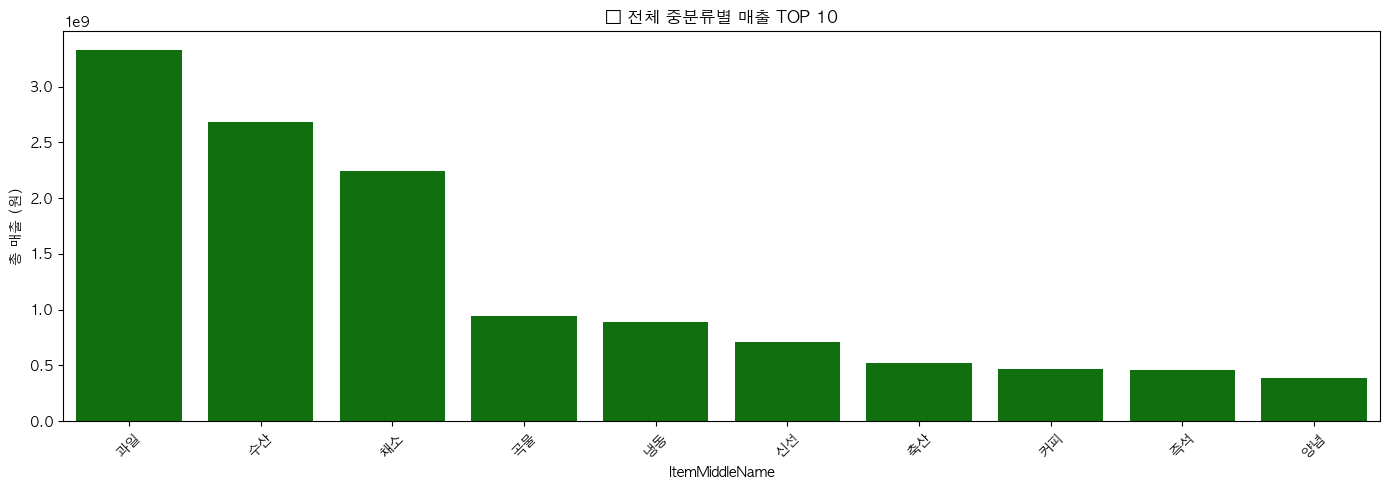

In [93]:
# 2030과 4060 고객 데이터를 합침
df_all = pd.concat([df_2030, df_4060])

# 중분류별 매출 집계
middle_all_sales = df_all.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False)

# TOP 10 시각화
plt.figure(figsize=(14, 5))
sns.barplot(x=middle_all_sales.head(10).index, y=middle_all_sales.head(10).values, color='green')
plt.title('💳 전체 중분류별 매출 TOP 10')
plt.xticks(rotation=45)
plt.ylabel('총 매출 (원)')
plt.tight_layout()
plt.show()


In [94]:
middle_all_sales

ItemMiddleName
과일    3329371620
수산    2684698980
채소    2241236290
곡물     943836910
냉동     888667860
신선     707649890
축산     525422790
커피     470943780
즉석     456501400
양념     387853660
과자     261296910
음료     199131990
생수      57165840
탄산      54098810
Name: Price, dtype: int64

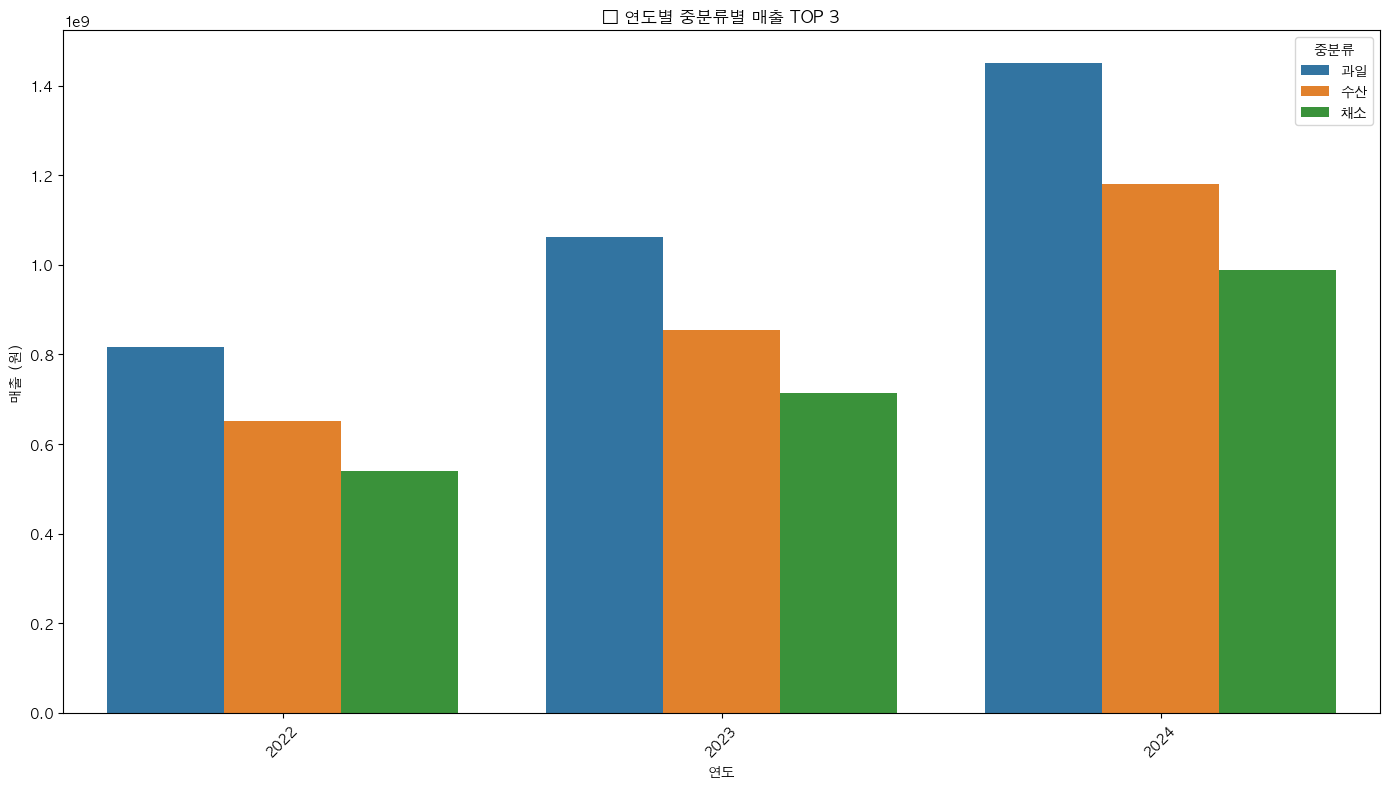

In [98]:
# 'OrderDT'에서 연도 정보 추출
df_all['Year'] = pd.to_datetime(df_all['OrderDT']).dt.year

# 연도별로 중분류별 매출 집계
middle_yearly_sales = df_all.groupby(['Year', 'ItemMiddleName'])['Price'].sum().reset_index()

# 각 연도별로 매출이 큰 TOP 5 중분류 추출
top_5_middle_yearly_sales = middle_yearly_sales.groupby('Year').apply(lambda x: x.nlargest(3, 'Price')).reset_index(drop=True)

# 시계열 그래프 시각화 (막대그래프)
plt.figure(figsize=(14, 8))

# 막대그래프 그리기
sns.barplot(data=top_5_middle_yearly_sales, x='Year', y='Price', hue='ItemMiddleName')

plt.title('📊 연도별 중분류별 매출 TOP 3')
plt.xlabel('연도')
plt.ylabel('매출 (원)')
plt.xticks(rotation=45)
plt.legend(title="중분류")
plt.tight_layout()
plt.show()



In [99]:
top_5_middle_yearly_sales

,Year,ItemMiddleName,Price
0,2022,과일,816490530
1,2022,수산,650391640
2,2022,채소,539788460
3,2023,과일,1062210680
4,2023,수산,854240230
5,2023,채소,713705770
6,2024,과일,1450670410
7,2024,수산,1180067110
8,2024,채소,987742060


## 매출 탑3 중분류 중 인기있는 소분류 연관분석

In [113]:
top2_middle = df_all.groupby('ItemMiddleName')['Price'].sum() \
                    .sort_values(ascending=False).head(2).index.tolist()


In [132]:
# TOP 3 중분류에 속한 데이터만 추출
df_top2_middle = df_all[df_all['ItemMiddleName'].isin(top2_middle)]

# 소분류별 매출 & 주문 수 기준 상위 소분류 추출
top_small = df_top2_middle.groupby('ItemSmallName').agg({
    'Price': 'sum',
    'idOrder': 'nunique'
}).sort_values(['idOrder', 'Price'], ascending=False).reset_index()

# 기준 소분류 a 선택 (가장 주문 많이 된 소분류)
a_item = top_small.iloc[0]['ItemSmallName']


In [114]:
top_small

,ItemSmallName,Price,idOrder
0,사과,1062803760,44558
1,토마토,636566280,34571
2,고등어,524303940,25582
3,김,411839640,25539
4,생선,262639500,18445
5,키위,434920870,18304
6,낙지,287453070,16644
7,과일,217569440,16523
8,딸기,268335920,16082
9,미역,211118690,14444


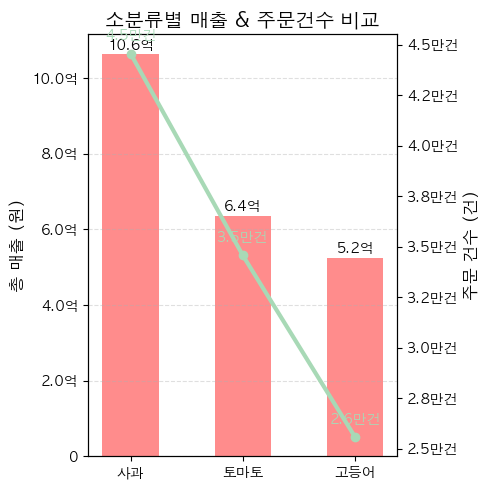

In [165]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 데이터
item_names = ['사과', '토마토', '고등어']
prices = [1062803760, 636566280, 524303940]
orders = [44558, 34571, 25582]

# 컬러 설정
color_bar = '#FF8C8C'   # 부드러운 핑크
color_line = '#A8D9B6'  # 파스텔 그린

# 한글 단위 포맷 함수
def won_formatter(x, _):
    if x >= 1e8:
        return f'{x/1e8:.1f}억'
    elif x >= 1e4:
        return f'{x/1e4:.0f}만'
    else:
        return f'{int(x):,}'

def count_formatter(x, _):
    if x >= 1e4:
        return f'{x/1e4:.1f}만건'
    elif x >= 1e3:
        return f'{x/1e3:.0f}천건'
    else:
        return f'{int(x)}건'

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(5, 5))

# ▶ 매출 막대
bars = ax1.bar(item_names, prices, color=color_bar, label='총 매출', width=0.5)
ax1.set_ylabel('총 매출 (원)', fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.yaxis.set_major_formatter(FuncFormatter(won_formatter))

# ▶ 주문 수 선
ax2 = ax1.twinx()
ax2.plot(item_names, orders, color=color_line, marker='o', linewidth=3, label='주문 건수')
ax2.set_ylabel('주문 건수 (건)', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.yaxis.set_major_formatter(FuncFormatter(count_formatter))

# ▶ 라벨, 그리드, 제목
plt.title('소분류별 매출 & 주문건수 비교', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# ▶ 막대 위에 매출 표시
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, height + 5e6, won_formatter(height, None),
             ha='center', va='bottom', fontsize=10)

# ▶ 선 위에 주문 건수 표시
for i, order in enumerate(orders):
    ax2.text(i, order + 500, count_formatter(order, None), ha='center', va='bottom', fontsize=10, color=color_line)

plt.tight_layout()
plt.show()


In [133]:
a_item

'사과'

In [134]:
# a_item이 포함된 주문번호 추출
a_orders = df_top2_middle[df_top2_middle['ItemSmallName'] == a_item]['idOrder'].unique()

# 해당 주문들에서 소분류 목록 추출
df_a_orders = df_top2_middle[df_top2_middle['idOrder'].isin(a_orders)]

# 주문별로 소분류 목록화
basket = df_a_orders.groupby('idOrder')['ItemSmallName'].unique().tolist()

# 연관 분석 준비
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 연관 규칙 도출 (a_item을 포함한 규칙만 필터링)
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# a_item이 포함된 연관 규칙만 보기
rules_a = rules[rules['antecedents'].apply(lambda x: a_item in x or a_item in str(x)) |
                rules['consequents'].apply(lambda x: a_item in x or a_item in str(x))]

# 보기 좋게 정렬
rules_a = rules_a.sort_values(['lift', 'confidence'], ascending=False)


In [135]:
rules_a[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
84,"(사과, 수박)",(김),0.010189,0.164255,1.086529
87,(수박),"(사과, 김)",0.010189,0.164255,1.086529
86,"(사과, 김)",(수박),0.010189,0.067399,1.086529
89,(김),"(사과, 수박)",0.010189,0.067399,1.086529
53,"(사과, 과일)",(고등어),0.013376,0.137169,1.035929
...,...,...,...,...,...
81,(사과),"(김, 미역)",0.010593,0.010593,1.000000
65,(사과),"(고등어, 키위)",0.010526,0.010526,1.000000
88,(사과),"(수박, 김)",0.010189,0.010189,1.000000
105,(사과),"(토마토, 낙지)",0.010189,0.010189,1.000000


사과는 단연 주력 상품임에도 불구하고, 해당 상품을 중심으로 한 고객의 구매 패턴이 명확하지 않고 연관성이 높은 조합이 부족

->  상품 전략, 추천 시스템, 패키지 상품 구성에서 기회 손실을 의미

-> 사과를 중심으로 고객 라이프스타일에 맞는 연관 상품 기획과 프로모션 연계 전략이 필요

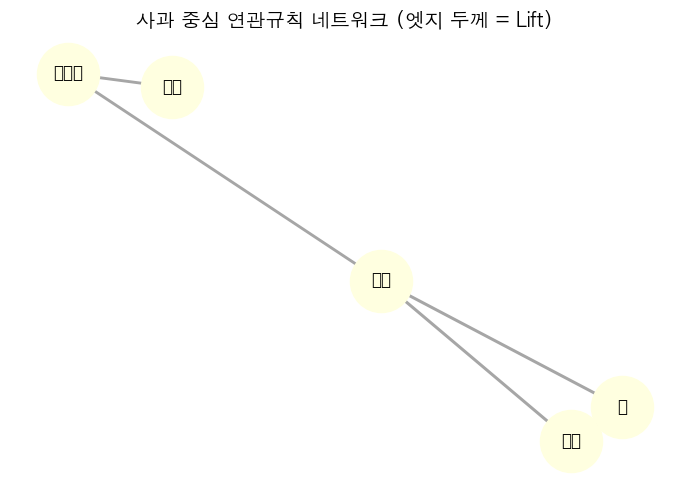

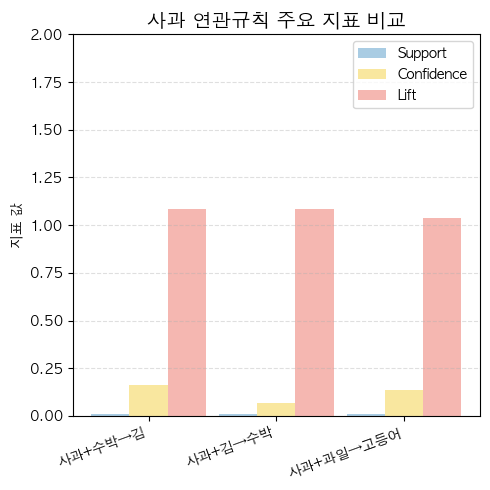

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.ticker import FuncFormatter

# 연관 규칙 데이터 생성
data = {
    'antecedents': [('사과', '수박'), ('사과', '김'), ('사과', '과일')],
    'consequents': [('김',), ('수박',), ('고등어',)],
    'support': [0.010189]*3,
    'confidence': [0.164255, 0.067399, 0.137169],
    'lift': [1.086529, 1.086529, 1.035929]
}
df = pd.DataFrame(data)

# -----------------------------
# 1️⃣ 네트워크 그래프
# -----------------------------
G = nx.DiGraph()
for i, row in df.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['lift'], confidence=row['confidence'])

pos = nx.spring_layout(G, seed=42)
weights = [d['weight'] for _, _, d in G.edges(data=True)]

plt.figure(figsize=(7, 5))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightyellow')
nx.draw_networkx_edges(G, pos, edge_color='gray', width=[w * 2 for w in weights], arrows=True, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("사과 중심 연관규칙 네트워크 (엣지 두께 = Lift)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# -----------------------------
# 2️⃣ 연관규칙 지표 비교 그래프
# -----------------------------
labels = ['사과+수박→김', '사과+김→수박', '사과+과일→고등어']
support = df['support']
confidence = df['confidence']
lift = df['lift']

x = range(len(labels))
width = 0.3

plt.figure(figsize=(5, 5))
plt.bar([p - width for p in x], support, width=width, label='Support', color='#A9CCE3')
plt.bar(x, confidence, width=width, label='Confidence', color='#F9E79F')
plt.bar([p + width for p in x], lift, width=width, label='Lift', color='#F5B7B1')
plt.ylim(0, 2.0)  # ✅ y축 최대값 늘려서 lift 막대 상대적으로 작게 보이도록

plt.xticks(ticks=x, labels=labels, rotation=20, ha='right')
plt.ylabel('지표 값')
plt.title('사과 연관규칙 주요 지표 비교', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [148]:
# 1. 4060 연령대 필터링
df_4060 = df[df['AgeGroup'].isin(['40대', '50대', '60대'])].copy()

# 2. 과일 & 채소 중분류 필터링
df_4060_fc = df_4060[df_4060['ItemMiddleName'].isin(['과일', '채소'])].copy()

# 3. 소분류명 전처리
df_4060_fc['ItemSmallName'] = df_4060_fc['ItemSmallName'].astype(str).str.replace(r"[^\w]", "", regex=True).str.lower()

# 4. 주문번호 기준 소분류 묶기
basket_4060_fc = df_4060_fc.groupby('idOrder')['ItemSmallName'].unique().tolist()

# 5. 2개 이상 품목 주문만 필터링
basket_4060_fc_filtered = [b for b in basket_4060_fc if len(b) >= 2]

# 6. Transaction encoding
te = TransactionEncoder()
te_ary = te.fit(basket_4060_fc_filtered).transform(basket_4060_fc_filtered)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 7. Apriori + 연관 규칙
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 8. 결과 정렬
rules_sorted = rules.sort_values(['lift', 'confidence'], ascending=False)

# 9. 상위 20개 출력
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20))


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


중분류 과일 안에 소분류 과일은 캔과일(가공식품)
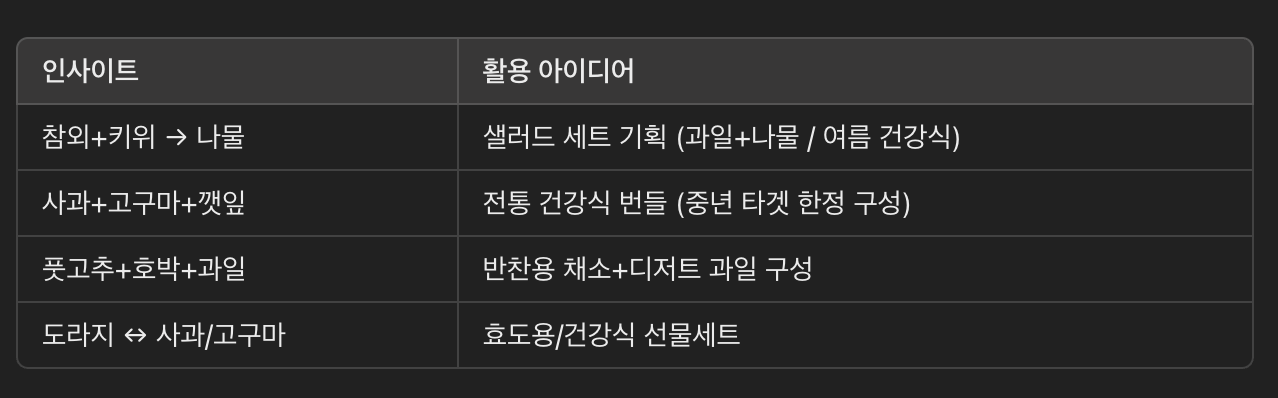

In [149]:
basket = df_all.groupby('idOrder')['ItemSmallName'].unique().reset_index()


In [150]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(basket['ItemSmallName']).transform(basket['ItemSmallName'])
df_trans = pd.DataFrame(te_ary, columns=te.columns_)


In [151]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent = apriori(df_trans, min_support=0.001, use_colnames=True)
rules = association_rules(frequent, metric="lift", min_threshold=1.0)


In [152]:
rules_with_bread = rules[rules['antecedents'].apply(lambda x: '빵' in x)]
rules_with_bread = rules_with_bread.sort_values(by='lift', ascending=False)


In [153]:
print(rules_with_bread[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

     antecedents consequents   support  confidence      lift
2555         (빵)    (수박, 김치)  0.001079    0.013645  1.205147
2122      (빵, 김)        (키위)  0.001359    0.127741  1.196395
4126     (즉석, 빵)         (파)  0.001616    0.144723  1.187821
3126     (빵, 냉동)         (배)  0.001441    0.064407  1.135821
2552     (빵, 생선)        (김치)  0.001581    0.212716  1.133861
4725     (빵, 냉동)   (사과, 고구마)  0.001237    0.055280  1.130473
2573         (빵)    (김치, 호박)  0.001732    0.021906  1.129768
4891     (빵, 냉동)   (사과, 토마토)  0.001085    0.048501  1.127239
3811     (빵, 멸치)        (사과)  0.001108    0.292308  1.124615
2130      (빵, 김)         (파)  0.001452    0.136513  1.120438


In [158]:
rules_with_pasta = rules[rules['antecedents'].apply(lambda x: '파스타' in x)]
rules_with_pasta = rules_with_pasta.sort_values(by='lift', ascending=False)

In [159]:
print(rules_with_pasta[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

     antecedents consequents   support  confidence      lift
2174    (김, 파스타)        (사과)  0.001062    0.304348  1.170938
1045       (파스타)   (고구마, 김치)  0.001021    0.040660  1.167369
3273   (냉동, 파스타)        (상추)  0.001120    0.156863  1.159351
4304   (커피, 파스타)        (사과)  0.001056    0.297209  1.143470
711        (파스타)        (상추)  0.003862    0.153810  1.136791
1373       (파스타)   (사과, 고구마)  0.001394    0.055530  1.135574
2591       (파스타)    (사과, 김치)  0.001149    0.045771  1.125611
1130   (냉동, 파스타)       (고구마)  0.001802    0.252451  1.121161
3438   (냉동, 파스타)       (토마토)  0.001604    0.224673  1.114112
773        (파스타)        (수박)  0.002106    0.083875  1.106151
